## IMPORT LIBRARIES

In [2]:
!pip install xverse

In [3]:
!pip install lime

  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=7f4d155b607b8b47b47f2c4bda9889af9c04ff90bc0802a124ad5c65e5adb3d8
  Stored in directory: c:\users\ertit\appdata\local\pip\cache\wheels\ed\d7\c9\5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


In [15]:
!pip install pandas==0.22

  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\ertit\Anaconda3\python.exe' 'C:\Users\ertit\AppData\Local\Temp\pip-standalone-pip-zshck1yx\__env_pip__.zip\pip' install --ignore-installed --no-user --prefix 'C:\Users\ertit\AppData\Local\Temp\pip-build-env-v4lxos14\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools Cython 'numpy==1.9.3; python_version=='"'"'3.5'"'"'' 'numpy==1.12.1; python_version=='"'"'3.6'"'"'' 'numpy==1.13.1; python_version>='"'"'3.7'"'"''
       cwd: None
  Complete output (365 lines):
  Ignoring numpy: markers 'python_version == "3.5"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.6"' don't match your environment
    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\ertit\Anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\ertit\\AppData\\Local\\Temp\\pip-install-0sspsble\\n

In [16]:
from xverse.ensemble import VotingSelector

In [17]:
import warnings
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib.pylab import rcParams
from matplotlib.patches import Patch
%matplotlib inline

## KONFIGURASI PANDAS DAN PLOT ##
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.option_context("display.max_rows", 100)
rcParams['figure.figsize'] = 12, 5
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sns.set_context("paper")
sns.set_palette("muted")

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None)
pd.option_context("display.max_rows", 100)


pd.options.display.max_columns=999
pd.options.display.max_rows=999

In [18]:
import pandas as pd
import xgboost as xgb
import lime.lime_tabular
from datetime import date
from sklearn import tree
from sklearn import metrics
from collections import defaultdict
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, classification_report, accuracy_score, roc_curve, average_precision_score, precision_recall_curve

In [19]:
from scipy.stats import pearsonr, spearmanr
from scipy.stats import chi2_contingency
from scipy.stats import chi2

## IMPORT DATASET

In [8]:
df_train = pd.read_csv('final_dataset.csv')

In [9]:
df_train.isnull().sum()

customer_id           0
most_recent           0
payment_method        0
payment_status        0
promo_amount          0
monetary              0
quantity              0
recency               0
frequency             0
transaction_amount    0
is_churn              0
age                   0
dtype: int64

## FEATURE SELECTION

In [10]:
#split data into independent features and target 
X = df_train.drop('is_churn',axis = 1)
y = df_train.is_churn

In [11]:
# Create correlation matrix
corr_matrix = df_train.corr()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.975)]

print(f'There are {len(to_drop)} correlated columns to remove.')
print(to_drop)

There are 0 correlated columns to remove.
[]


In [12]:
df_train.isnull().sum()

customer_id           0
most_recent           0
payment_method        0
payment_status        0
promo_amount          0
monetary              0
quantity              0
recency               0
frequency             0
transaction_amount    0
is_churn              0
age                   0
dtype: int64

In [23]:
# call Votingselector with minimum_votes of 2 
clf = VotingSelector(minimum_votes=2)
clf.fit(X, y)

AttributeError: module 'pandas.core.algorithms' has no attribute 'quantile'

In [14]:
#show important features 
clf.feature_importances_

AttributeError: 'VotingSelector' object has no attribute 'feature_importances_'

In [12]:
#show important features 
clf.feature_importances_.iloc[:30,:]

Variable_Name  Information_Value  Random_Forest  \
0           total_freq_debit_6bln           0.978250       0.019581   
1            total_amt_debit_6bln           0.910444       0.033281   
2           total_amt_credit_6bln           0.910444       0.048826   
3           total_hari_debit_6bln           0.910444       0.021587   
4              Max_ratas_last6bln           0.910444       0.016993   
5        Q3_Delay_amt_Credit_6bln           0.896272       0.037613   
6         Q1_Delay_amt_Debit_3bln           0.879435       0.007764   
7        Q1_Delay_freq_Debit_6bln           0.852962       0.006868   
8   total_ratas_saldo_last_month6           0.848998       0.014329   
9        Q1_Delay_freq_Debit_3bln           0.836284       0.007030   
10       Q1_Delay_amt_Credit_6bln           0.835109       0.018227   
11       Q3_Delay_freq_Debit_3bln           0.821483       0.007246   
12         Max_cbal_base_last6bln           0.819323       0.012825   
13         Rata2_Ratas_Saldo_3bln           0.819323       0.021742   
14       Q2_Delay_freq_Debit_3bln           0.816590       0.007499   
15        Q1_Delay_amt_Debit_6bln           0.811859       0.007268   
16    total_cbal_base_last_month6           0.807295       0.018473   
17       Q3_Delay_freq_Debit_6bln           0.805877       0.010648   
18          total_hari_debit_3bln           0.804631       0.023005   
19         Rata2_Ratas_Saldo_6bln           0.790324       0.017128   
20          total_freq_debit_3bln           0.789612       0.016146   
21       Q2_Delay_freq_Debit_6bln           0.787874       0.007077   
22       Q2_Delay_amt_Credit_6bln           0.759913       0.020522   
23  total_ratas_saldo_last_month5           0.748062       0.013492   
24               Rata2_Saldo_3bln           0.734297       0.012698   
25    total_cbal_base_last_month5           0.720690       0.009683   
26  total_ratas_saldo_last_month2           0.707240       0.011428   
27  total_ratas_saldo_last_month1           0.707240       0.016148   
28               Rata2_Saldo_6bln           0.696304       0.015765   
29    total_cbal_base_last_month1           0.693946       0.016962   

    Recursive_Feature_Elimination  Extra_Trees  Chi_Square         L_One  
0                    0.000000e+00     0.012817    0.283411 -1.294084e-04  
1                    7.278892e-08     0.012812    0.474618 -1.581987e-09  
2                   -1.069130e-07     0.014657    0.694958 -3.145517e-09  
3                    0.000000e+00     0.017720   10.122727  7.988240e-03  
4                   -9.740528e-08     0.008295    1.705605 -2.560647e-08  
5                    7.582510e-08     0.026342   21.076764  6.422830e-08  
6                   -4.516089e-07     0.009558    2.454611 -7.994677e-07  
7                    0.000000e+00     0.009890    0.272736  1.240838e-02  
8                    1.742968e-07     0.008723    1.590955  4.756859e-08  
9                    0.000000e+00     0.012112    0.523760  0.000000e+00  
10                   2.151187e-07     0.020807   21.113458  1.109210e-07  
11                   0.000000e+00     0.011288    0.382397  1.797668e-03  
12                   5.311697e-08     0.007739    1.255411  6.175134e-09  
13                   1.764191e-08     0.009824    0.937880 -1.617595e-08  
14                   0.000000e+00     0.012142    0.499159 -9.660578e-03  
15                  -4.969980e-07     0.006972    0.419747  4.013266e-07  
16                   3.812526e-08     0.008680    3.060255 -1.551868e-08  
17                   0.000000e+00     0.010975    0.303488  0.000000e+00  
18                   0.000000e+00     0.019376   12.175581  0.000000e+00  
19                   8.735612e-09     0.009038    0.376045  5.463670e-08  
20                   0.000000e+00     0.010494    0.449048  0.000000e+00  
21                   0.000000e+00     0.011956    0.338626 -1.278116e-02  
22                  -2.226349e-07     0.029791   20.342245 -1.154594e-07  
23                

In [13]:
# votes 
clf.feature_votes_.iloc[:40, :]

Variable_Name  Information_Value  Random_Forest  \
37        Q3_Delay_amt_Debit_3bln                  1              1   
8   total_ratas_saldo_last_month6                  1              1   
23  total_ratas_saldo_last_month5                  1              1   
24               Rata2_Saldo_3bln                  1              1   
41       Q1_Delay_amt_Credit_3bln                  1              1   
39       Q3_Delay_amt_Credit_3bln                  1              1   
10       Q1_Delay_amt_Credit_6bln                  1              1   
6         Q1_Delay_amt_Debit_3bln                  1              1   
5        Q3_Delay_amt_Credit_6bln                  1              1   
4              Max_ratas_last6bln                  1              1   
36    total_cbal_base_last_month4                  1              1   
22       Q2_Delay_amt_Credit_6bln                  1              1   
34        Q2_Delay_amt_Debit_3bln                  1              1   
78                           Usia                  0              1   
43       Q2_Delay_amt_Credit_3bln                  1              1   
40        Q2_Delay_amt_Debit_6bln                  1              1   
30  total_ratas_saldo_last_month4                  1              1   
29    total_cbal_base_last_month1                  1              1   
27  total_ratas_saldo_last_month1                  1              1   
26  total_ratas_saldo_last_month2                  1              1   
35         Min_cbal_base_last6bln                  1              1   
19         Rata2_Ratas_Saldo_6bln                  1              1   
44        Q3_Delay_amt_Debit_6bln                  1              1   
38    total_cbal_base_last_month3                  1              1   
46          total_amt_credit_3bln                  1              1   
16    total_cbal_base_last_month6                  1              1   
13         Rata2_Ratas_Saldo_3bln                  1              1   
50         total_hari_credit_6bln                  1              1   
81        Max_amt_credit_last6Bln                  0              1   
84         Max_amt_debit_last6Bln                  0              1   
3           total_hari_debit_6bln                  1              1   
2           total_amt_credit_6bln                  1              1   
45      jenis_pekerjaan_UNDEFINED                  1              0   
42           total_amt_debit_3bln                  1              1   
47      Q3_Delay_freq_Credit_6bln                  1              1   
49      Q1_Delay_freq_Credit_6bln                  1              1   
1            total_amt_debit_6bln                  1              1   
0           total_freq_debit_6bln                  1              1   
28               Rata2_Saldo_6bln                  1              1   
32             Min_ratas_last6bln                  1              1   

    Recursive_Feature_Elimination  Extra_Trees  Chi_Square  L_One  Votes  
37                              1            1           1      1      6  
8                               1            1           1      1      6  
23                              1            1           1      1      6  
24                              1            1           1      1      6  
41                              1            1           1      1      6  
39                              1            1           1      1      6  
10                              1            1           1      1      6  
6                               1            1           1      1      6  
5                               1            1           1      1      6  
4                               1            1           1      1      6  
36                              1            1           1      1      6  
22                              1            1           1      1      6  
34                              1            1           0      1      5  
78                              1            1           1

In [14]:
# votes 
clf.feature_votes_.iloc[40:, :]

Variable_Name  Information_Value  \
18                             total_hari_debit_3bln                  1   
11                          Q3_Delay_freq_Debit_3bln                  1   
12                            Max_cbal_base_last6bln                  1   
14                          Q2_Delay_freq_Debit_3bln                  1   
31                       total_cbal_base_last_month2                  1   
..                                               ...                ...   
83                     total_freq_credit_last_month1                  0   
64                      total_freq_debit_last_month3                  0   
67                      total_freq_debit_last_month2                  0   
76                           Min_freq_debit_last6Bln                  0   
106  jenis_pekerjaan_TECHNICAL / ENGINEERING-LAINNYA                  0   

     Random_Forest  Recursive_Feature_Elimination  Extra_Trees  Chi_Square  \
18               1                              0            1           1   
11               1                              0            1           0   
12               1                              1            0           1   
14               1                              0            1           0   
31               1                              1            0           0   
..             ...                            ...          ...         ...   
83               0                              0            0           0   
64               0                              0            0           0   
67               0                              0            0           0   
76               0                              0            0           0   
106              0                              0            0           0   

     L_One  Votes  
18       0      4  
11       1      4  
12       0      4  
14       1      4  
31       1      4  
..     ...    ...  
83       0      0  
64       0      0  
67       0      0  
76       0      0  
106      0      0  

[67 rows x 8 columns]

In [15]:
X_new = clf.transform(X)

In [16]:
fitur_vote = X_new.columns.to_list()

In [17]:
fitur_vote

['Q3_Delay_amt_Debit_3bln',
 'total_ratas_saldo_last_month6',
 'total_ratas_saldo_last_month5',
 'Rata2_Saldo_3bln',
 'Q1_Delay_amt_Credit_3bln',
 'Q3_Delay_amt_Credit_3bln',
 'Q1_Delay_amt_Credit_6bln',
 'Q1_Delay_amt_Debit_3bln',
 'Q3_Delay_amt_Credit_6bln',
 'Max_ratas_last6bln',
 'total_cbal_base_last_month4',
 'Q2_Delay_amt_Credit_6bln',
 'Q2_Delay_amt_Debit_3bln',
 'Usia',
 'Q2_Delay_amt_Credit_3bln',
 'Q2_Delay_amt_Debit_6bln',
 'total_ratas_saldo_last_month4',
 'total_cbal_base_last_month1',
 'total_ratas_saldo_last_month1',
 'total_ratas_saldo_last_month2',
 'Min_cbal_base_last6bln',
 'Rata2_Ratas_Saldo_6bln',
 'Q3_Delay_amt_Debit_6bln',
 'total_cbal_base_last_month3',
 'total_amt_credit_3bln',
 'total_cbal_base_last_month6',
 'Rata2_Ratas_Saldo_3bln',
 'total_hari_credit_6bln',
 'Max_amt_credit_last6Bln',
 'Max_amt_debit_last6Bln',
 'total_hari_debit_6bln',
 'total_amt_credit_6bln',
 'jenis_pekerjaan_UNDEFINED',
 'total_amt_debit_3bln',
 'Q3_Delay_freq_Credit_6bln',
 'Q1_Dela

## Information Value

In [21]:
def get_information_values(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    data_iv, data_woe = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp = pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        data_iv = pd.concat([data_iv, temp], axis=0)
        data_woe = pd.concat([data_woe, d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)

    return data_iv, data_woe

In [22]:
iv_res, woe_res = get_information_values(df_train, target='is_churn')

Information value of customer_id is 0.000975
Information value of most_recent is 1.452661
Information value of payment_method is 0.001316
Information value of payment_status is 0.0
Information value of promo_amount is 0.009361
Information value of monetary is 0.001133
Information value of quantity is 5.3e-05
Information value of recency is 12.268283
Information value of frequency is 3.337733
Information value of transaction_amount is 3.6e-05
Information value of age is 0.000558


In [17]:
iv_res.sort_values('IV', ascending=False)['Variable'].to_list()

['total_most_used',
 'total_last_used',
 'last_used_pct_dev',
 'most_used_pct_dev',
 'total_most_used_cnt_l3d',
 'total_last_used_cnt_l3d',
 'total_last_used_cnt_l2d',
 'total_most_used_cnt_l2d',
 'last_used_pct_l3d_dev',
 'last_used_pct_l2d_dev',
 'total_last_used_cnt_l1d',
 'most_used_pct_l3d_dev',
 'last_used_pct_l1d_dev',
 'total_most_used_cnt_l1d',
 'most_used_pct_l2d_dev',
 'total_last_used_cnt_l12h',
 'last_used_pct_l12h_dev',
 'most_used_pct_l1d_dev',
 'total_last_used_cnt_l6h',
 'most_used_pct_l1h_dev',
 'most_used_pct_l12h_dev',
 'most_used_pct_l6h_dev',
 'most_used_pct_l3h_dev',
 'total_last_used_cnt_l3h',
 'total_most_used_cnt_l12h',
 'total_last_used_cnt_l1h',
 'total_most_used_cnt_l6h',
 'total_most_used_cnt_l3h',
 'last_used_pct_l6h_dev',
 'total_most_used_cnt_l1h',
 'last_used_pct_l3h_dev',
 'last_used_pct_l1h_dev',
 'device_used',
 'last_used_pct',
 'most_used_pct',
 'diff_last_device_l3d',
 'diff_last_pct_l3d',
 'diff_last_pct_l2d',
 'diff_most_device_l3d',
 'diff_las

In [18]:
woe_res.groupby('Variable').agg('sum').to_csv('iv_and_woe_456_filtered.csv', index=True)

In [19]:
iv_res[(iv_res.IV <= 0.5) & (iv_res.IV >= 0.02)].sort_values('IV', ascending=False)

Variable        IV
0     most_used_pct_l12h  0.479786
0      most_used_pct_l3h  0.474841
0      most_used_pct_l6h  0.473805
0      login_attempt_l1d  0.470637
0      most_used_pct_l1d  0.465278
0      diff_most_pct_l1h  0.457243
0      most_used_pct_l2d  0.454901
0      most_used_pct_l3d  0.445548
0      diff_most_pct_l3h  0.432944
0      diff_most_pct_l6h  0.412002
0       otp_interval_max  0.400356
0     diff_most_pct_l12h  0.396315
0      most_used_pct_l1h  0.384052
0      most_used_cnt_l1h  0.374072
0      diff_most_pct_l1d  0.361906
0  diff_most_device_l12h  0.361846
0      most_used_cnt_l3h  0.352226
0      most_used_cnt_l6h  0.343140
0      diff_most_pct_l2d  0.337488
0        otp_attempt_min  0.337107
0     most_used_cnt_l12h  0.336681
0          most_used_cnt  0.326743
0     login_attempt_l12h  0.300214
0   diff_most_device_l6h  0.271413
0      most_used_cnt_l3d  0.269362
0      most_used_cnt_l2d  0.230852
0      login_attempt_l6h  0.209166
0      otp_interval_mean  0.208005
0   diff_most_device_l3h  0.199633
0       otp_attempt_mean  0.148191
0      most_used_cnt_l1d  0.143999
0      last_used_cnt_l3d  0.131956
0   diff_most_device_l1h  0.126864
0      login_attempt_l3h  0.125366
0      last_used_cnt_l2d  0.121008
0       otp_interval_min  0.106628
0          last_used_cnt  0.101234
0      last_used_cnt_l1d  0.089888
0    otp_interval_median  0.085479
0      login_attempt_l1h  0.052296
0     last_used_cnt_l12h  0.052085
0        otp_attempt_max  0.046676
0     otp_attempt_median  0.045789
0      last_used_cnt_l6h  0.031516

### FITUR 1

#### 0.02 <= IV <= 0.5

In [20]:
iv_res1 = iv_res[(iv_res.IV <= 0.5) & (iv_res.IV >= 0.02)].set_index('Variable')

In [21]:
list_fitur_1 = iv_res1.sort_values('IV', ascending=False).T.columns.to_list()

In [22]:
list_fitur_1

['most_used_pct_l12h',
 'most_used_pct_l3h',
 'most_used_pct_l6h',
 'login_attempt_l1d',
 'most_used_pct_l1d',
 'diff_most_pct_l1h',
 'most_used_pct_l2d',
 'most_used_pct_l3d',
 'diff_most_pct_l3h',
 'diff_most_pct_l6h',
 'otp_interval_max',
 'diff_most_pct_l12h',
 'most_used_pct_l1h',
 'most_used_cnt_l1h',
 'diff_most_pct_l1d',
 'diff_most_device_l12h',
 'most_used_cnt_l3h',
 'most_used_cnt_l6h',
 'diff_most_pct_l2d',
 'otp_attempt_min',
 'most_used_cnt_l12h',
 'most_used_cnt',
 'login_attempt_l12h',
 'diff_most_device_l6h',
 'most_used_cnt_l3d',
 'most_used_cnt_l2d',
 'login_attempt_l6h',
 'otp_interval_mean',
 'diff_most_device_l3h',
 'otp_attempt_mean',
 'most_used_cnt_l1d',
 'last_used_cnt_l3d',
 'diff_most_device_l1h',
 'login_attempt_l3h',
 'last_used_cnt_l2d',
 'otp_interval_min',
 'last_used_cnt',
 'last_used_cnt_l1d',
 'otp_interval_median',
 'login_attempt_l1h',
 'last_used_cnt_l12h',
 'otp_attempt_max',
 'otp_attempt_median',
 'last_used_cnt_l6h']

## FITUR 2

#### IV 0.1 < IV <= 0.5

In [23]:
iv_res2 = iv_res[(iv_res.IV <= 0.5) & (iv_res.IV > 0.1)].set_index('Variable')

In [24]:
list_fitur_2 = iv_res2.sort_values('IV', ascending=False).T.columns.to_list()

In [37]:
len(list_fitur_2)

37

## FITUR 3

#### IV 0.3 < IV <= 0.5

In [26]:
iv_res3 = iv_res[(iv_res.IV <= 0.5) & (iv_res.IV > 0.3)].set_index('Variable')

In [27]:
list_fitur_3 = iv_res3.sort_values('IV', ascending=False).T.columns.to_list()

In [28]:
list_fitur_3

['most_used_pct_l12h',
 'most_used_pct_l3h',
 'most_used_pct_l6h',
 'login_attempt_l1d',
 'most_used_pct_l1d',
 'diff_most_pct_l1h',
 'most_used_pct_l2d',
 'most_used_pct_l3d',
 'diff_most_pct_l3h',
 'diff_most_pct_l6h',
 'otp_interval_max',
 'diff_most_pct_l12h',
 'most_used_pct_l1h',
 'most_used_cnt_l1h',
 'diff_most_pct_l1d',
 'diff_most_device_l12h',
 'most_used_cnt_l3h',
 'most_used_cnt_l6h',
 'diff_most_pct_l2d',
 'otp_attempt_min',
 'most_used_cnt_l12h',
 'most_used_cnt',
 'login_attempt_l12h']

In [29]:
#df_iv = pd.read_csv('../output_iv.csv')

df_iv = iv_res[(iv_res.IV <= 0.5) & (iv_res.IV > 0.02)].sort_values('IV', ascending=False)

In [30]:
len(iv_res3)

23

In [34]:
df_iv = df_iv[(df_iv.IV < 0.5) & (df_iv.IV >= 0.1)]

In [35]:
def bar_iv():
    fig, ax = plt.subplots(figsize=(20,10))
    sns.barplot(x='IV', y='Variable',data=df_iv.sort_values('IV', ascending=False).reset_index(), orient='h',palette='YlGn_r')
    plt.xlabel('Information Value')
    plt.ylabel('Features')
    ax.yaxis.label.set_size(10)
    ax.xaxis.label.set_size(10)

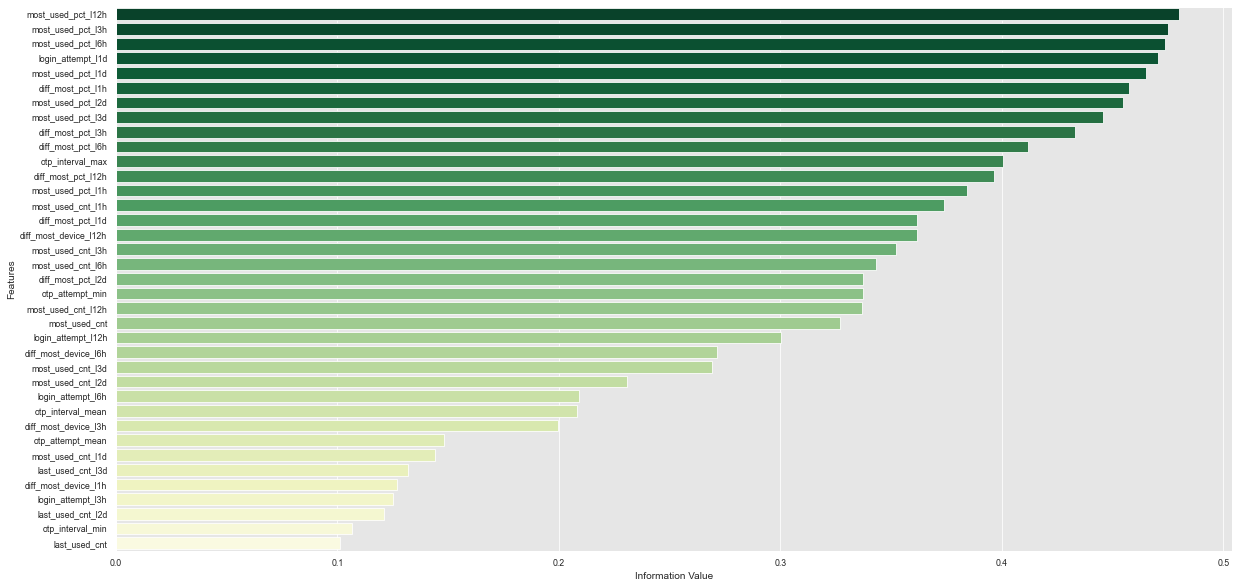

In [36]:
bar_iv()

In [35]:
amt_all = ['total_amt_debit_last_month1',
 'total_amt_credit_last_month1',
    'total_amt_debit_last_month2',
 'total_amt_credit_last_month2',
'total_amt_debit_last_month3',
 'total_amt_credit_last_month3',
    'total_amt_debit_last_month4',
 'total_amt_credit_last_month4',
'total_amt_debit_last_month5',
 'total_amt_credit_last_month5',
    'total_amt_debit_last_month6',
 'total_amt_credit_last_month6', 'Flag']

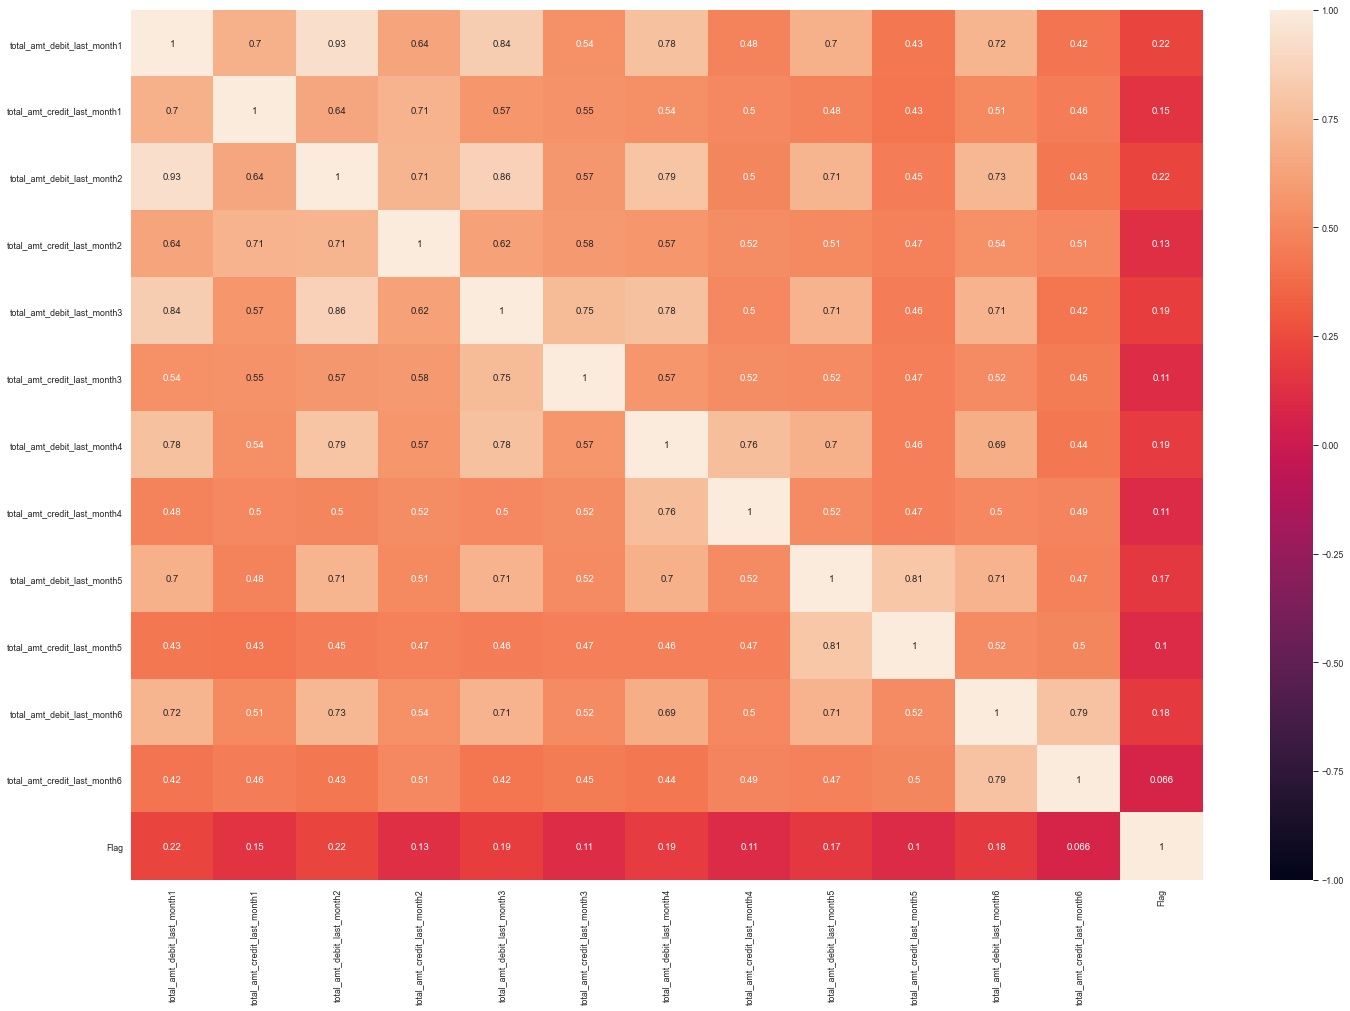

In [36]:
fig, ax = plt.subplots(figsize=(24,16))
sns.heatmap(df_train[amt_all].corr(method='spearman'), vmin=-1, vmax=1, annot=True)
plt.show()

In [37]:
frek_all = ['total_freq_debit_last_month1',
 'total_freq_credit_last_month1',
    'total_freq_debit_last_month2',
 'total_freq_credit_last_month2',
'total_freq_debit_last_month3',
 'total_freq_credit_last_month3',
    'total_freq_debit_last_month4',
 'total_freq_credit_last_month4',
'total_freq_debit_last_month5',
 'total_freq_credit_last_month5',
    'total_freq_debit_last_month6',
 'total_freq_credit_last_month6', 'Flag']

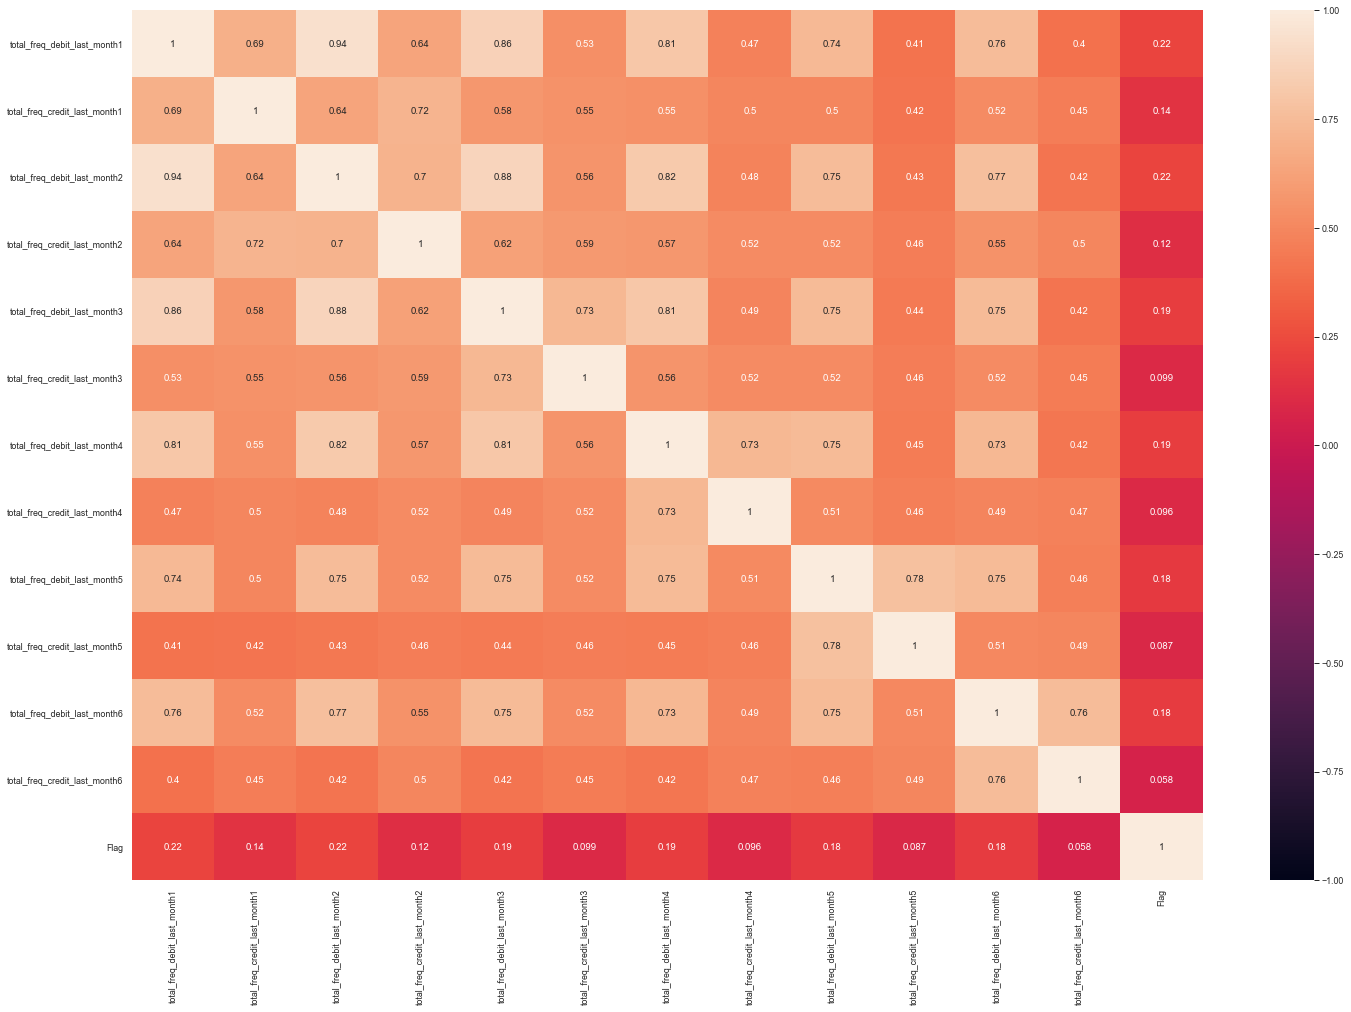

In [38]:
fig, ax = plt.subplots(figsize=(24,16))
sns.heatmap(df_train[frek_all].corr(method='spearman'), vmin=-1, vmax=1, annot=True)
plt.show()

In [39]:
saldo_all = ['total_cbal_base_last_month1',
 'total_ratas_saldo_last_month1','total_cbal_base_last_month2',
 'total_ratas_saldo_last_month2','total_cbal_base_last_month3',
 'total_ratas_saldo_last_month3','total_cbal_base_last_month4',
 'total_ratas_saldo_last_month4','total_cbal_base_last_month5',
 'total_ratas_saldo_last_month5','total_cbal_base_last_month6',
 'total_ratas_saldo_last_month6','Flag']

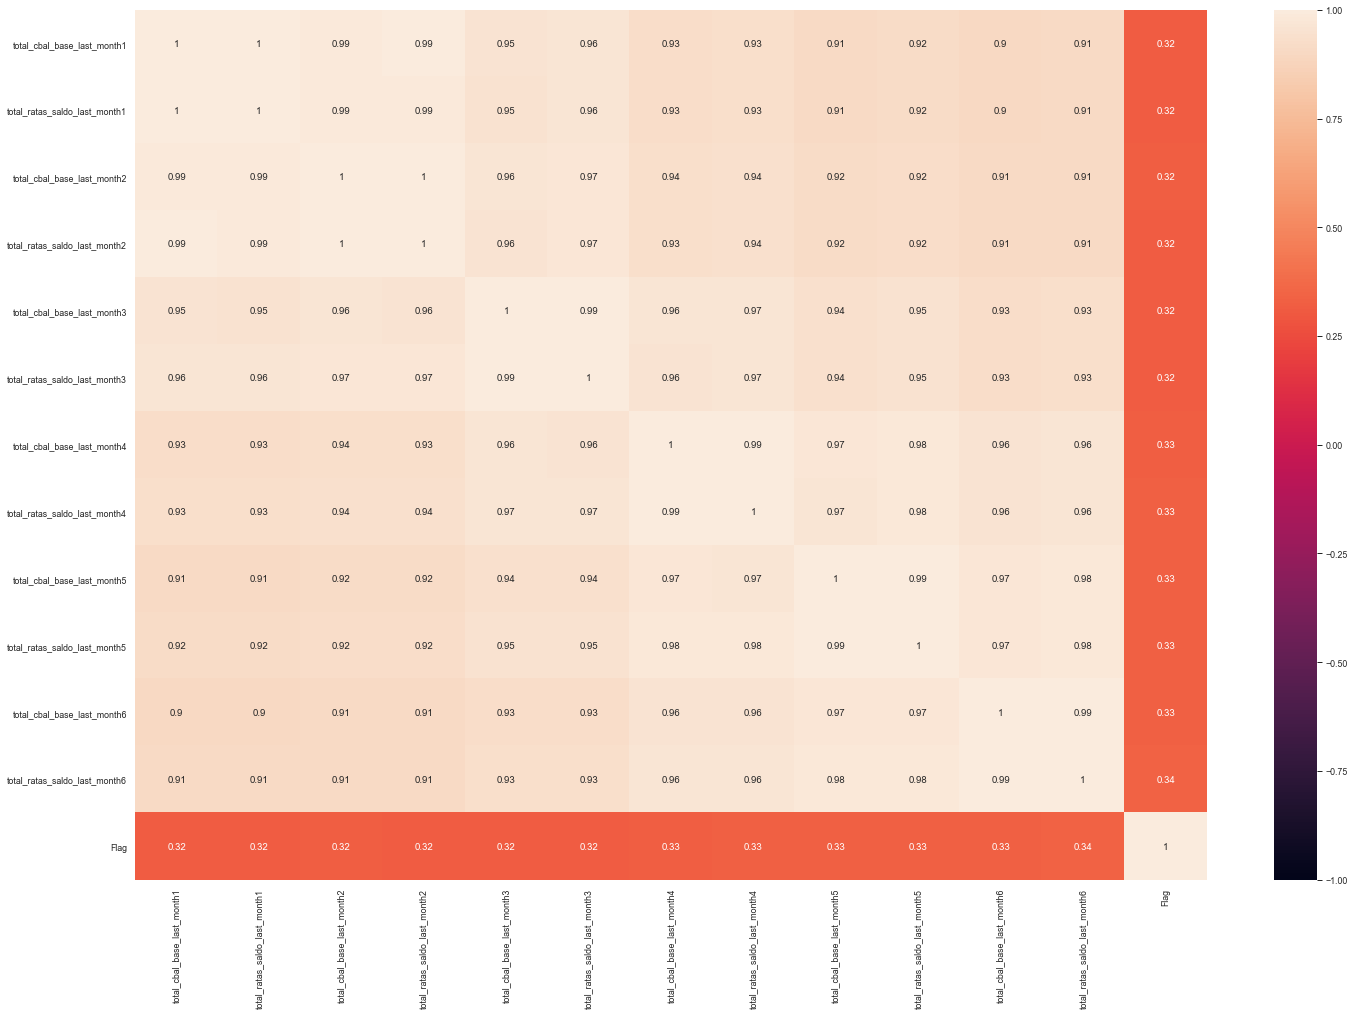

In [40]:
fig, ax = plt.subplots(figsize=(24,16))
sns.heatmap(df_train[saldo_all].corr(method='spearman'), vmin=-1, vmax=1, annot=True)
plt.show()

# Feature selection yg baru dari sini (feature tools)

## Correlation

In [60]:
def cross_corr_mean(df_input, corr_coeff, savefile=1):
    """ The function retuns a list of features to be dropped from the input features.
    
    INPUTS:
    1. df_input: n input features (pandas dataframe)
    2. corr_coeff: Coefficient threshold (absolute value, no negatives) for a pair of variables above which one of the two will be dropped
    3. plot: If set to 1 a plot will be displayed showing a heatmap of the cross-correlation between variables 
    4. savefile: If set to 1, all relevant files will be saved
    
    PLEASE NOTE:
    - The dataframe df_input (should contain only the n input features i.e. no ID and targets) 
    
    SUMMARY OF LOGIC:
    1. The n input variables are taken and a n X n matrix of correlation is created (these are absolute values i.e. a correlation of -0.8 is treated as 0.8)
    2. Variable pairs with correlation higher than the corr_coeff threshold are picked and one of the two variables will be dropped
    3. Which of the two will be dropped is based on the one having lower mean absolute correlation with all other variables 

    SAVED FILES:
    If savefile is set to 1. Saved under current directory under cross_corr_target under folder with a UTC timestamp.
    1. A PDF heatmap representing the cross correlation between all the input features
    2. A CSV of the matrix containing the values used for the heatmap
    3. A CSV of the list of variables to be dropped
    """
        # Pre-processing
    import pandas as pd
    if savefile == 1:
        from datetime import datetime
        time = str(datetime.utcnow())
        import os
        path = str(os.getcwd()) + "/cross_corr_mean/" + str(time[0:19].replace(':',"-")) + "/"
        os.makedirs(path)

    # Generating correlation matrix of input features
    corr_matrix = df_input.corr(method = 'spearman') # For more info on the methods please refer to https://www.kaggle.com/kiyoung1027/correlation-pearson-spearman-and-kendall

    # Generating correlation with the target
    corr_mean = (np.abs(corr_matrix)).mean()

    # Saving files
    if savefile == 1:
        corr_matrix.to_csv(path + "cross_corr.csv")
        corr_mean.to_csv(path + "corr_abs_mean.csv")

    # Preparing data
    features_drop_list = [] # This will contain the list of features to be dropped
    features_index_drop_list = [] # This will contain the index of features to be dropped as per df_input
    corr_matrix = np.abs(corr_matrix)

    # Selecting features to be dropped (Using two for loops that runs on one triangle of the corr_matrix to avoid checking the correlation of a variable with itself)
    for i in range(corr_matrix.shape[0]):
        for j in range(i+1,corr_matrix.shape[0]):

            # The following if statement checks if each correlation value is higher than threshold (or equal) and also ensures the two columns have NOT been dropped already.  
            if corr_matrix.iloc[i,j]>corr_coeff and i not in features_index_drop_list and j not in features_index_drop_list:
            
                # The following if statement checks which of the 2 variables with high correlation has a lower correlation with target and then drops it. If equal we can drop any and it drops the first one (This is arbitrary)
                if corr_mean[corr_matrix.columns[i]] >= corr_mean[corr_matrix.columns[j]]:
                    features_drop_list.append(corr_matrix.columns[i])	# Name of variable that needs to be dropped appended to list
                    features_index_drop_list.append(i)	# Index of variable that needs to be dropped appended to list. This is used to not check for the same variables repeatedly
                else:
                    features_drop_list.append(corr_matrix.columns[j])
                    features_index_drop_list.append(j)
    # Saving final list
    if savefile ==1:
        pd.Series(features_drop_list).to_csv(path + "features_drop_list.csv")

    return features_drop_list

In [39]:
df_train.head()

phoneno  device_used  device_used_nan  login_attempt  last_used_cnt  \
0  8.958113e+11          1.0                0            4.0            4.0   
1  8.958112e+11          1.0                0            2.0            2.0   
2  8.958111e+11          1.0                0            3.0            3.0   
3  8.958106e+11          2.0                0            4.0            2.0   
4  8.958106e+11          1.0                0            5.0            5.0   

   most_used_cnt  login_attempt_l1h  login_attempt_l3h  login_attempt_l6h  \
0            4.0                4.0                4.0                4.0   
1            2.0                2.0                2.0                2.0   
2            3.0                3.0                3.0                3.0   
3            2.0                2.0                2.0                2.0   
4            5.0                2.0                5.0                5.0   

   login_attempt_l12h  login_attempt_l1d  login_attempt_l2d  \
0                 4.0                4.0                4.0   
1                 2.0                2.0                2.0   
2                 3.0                3.0                3.0   
3                 2.0                2.0                2.0   
4                 5.0                5.0                5.0   

   login_attempt_l3d  last_used_cnt_l1h  last_used_cnt_l3h  last_used_cnt_l6h  \
0                4.0                4.0                4.0                4.0   
1                2.0                2.0                2.0                2.0   
2                3.0                3.0                3.0                3.0   
3                2.0                2.0                2.0                2.0   
4                5.0                2.0                5.0                5.0   

   last_used_cnt_l12h  last_used_cnt_l1d  last_used_cnt_l2d  \
0                 4.0                4.0                4.0   
1                 2.0                2.0                2.0   
2                 3.0                3.0                3.0   
3                 2.0                2.0                2.0   
4                 5.0                5.0                5.0   

   last_used_cnt_l3d  diff_last_device_l1h  diff_last_device_l3h  \
0                4.0                   0.0                   0.0   
1                2.0                   0.0                   0.0   
2                3.0                   0.0                   0.0   
3                2.0                   0.0                   0.0   
4                5.0                   0.0                   0.0   

   diff_last_device_l6h  diff_last_device_l12h  diff_last_device_l1d  \
0                   0.0                    0.0                   0.0   
1                   0.0                    0.0                   0.0   
2                   0.0                    0.0                   0.0   
3                   0.0                    0.0                   0.0   
4                   0.0                    0.0                   0.0   

   diff_last_device_l2d  diff_last_device_l3d  most_used_cnt_l1h  \
0                   0.0                   0.0                4.0   
1                   0.0                   0.0                2.0   
2                   0.0                   0.0                3.0   
3                   0.0                   0.0                0.0   
4                   0.0                   0.0                2.0   

   most_used_cnt_l3h  most_used_cnt_l6h  most_used_cnt_l12h  \
0                4.0                4.0                 4.0   
1                2.0                2.0                 2.0   
2                3.0                3.0                 3.0   
3                0.0                0.0                 0.0   
4                5.0                5.0                 5.0   

   most_used_cnt_l1d  most_used_cnt_l2d  most_used_cnt_l3d  \
0                4.0                4.0                4.0   
1                2.0                2.0                2.0   
2        

In [40]:
#list_vote = fitur_vote
#list_vote.append('Flag')

In [41]:
to_drop=['phoneno','fraud']
df_corr = df_train.drop(columns = to_drop, axis=1)

In [42]:
correlation_vote = cross_corr_mean(df_corr, corr_coeff=0.9, savefile=1)

In [43]:
df_corr['fraud'] = df_train['fraud']
df_selected_features_vote = df_corr.drop(columns=correlation_vote)
selected_features_vote = df_selected_features_vote.columns.to_list()[:-1]

In [44]:
selected_features_vote

['device_used',
 'device_used_nan',
 'last_used_cnt',
 'login_attempt_l1d',
 'login_attempt_l3d',
 'last_used_cnt_l1h',
 'last_used_cnt_l6h',
 'last_used_cnt_l1d',
 'last_used_cnt_l3d',
 'most_used_cnt_l12h',
 'most_used_cnt_l1d',
 'most_used_cnt_l2d',
 'total_last_used',
 'total_last_used_cnt_l1h',
 'total_last_used_cnt_l1d',
 'total_most_used_cnt_l1h',
 'total_most_used_cnt_l1d',
 'total_init',
 'total_success',
 'otp_attempt_mean',
 'otp_attempt_median',
 'otp_attempt_min',
 'otp_attempt_max',
 'otp_interval_median',
 'otp_interval_min',
 'otp_interval_max',
 'last_used_pct_l1h',
 'last_used_pct_l3h',
 'last_used_pct_l12h',
 'last_used_pct_l1d',
 'last_used_pct_l2d',
 'last_used_pct_l1h_dev',
 'most_used_pct',
 'most_used_pct_l3d',
 'most_used_pct_dev',
 'most_used_pct_l3d_dev',
 'diff_last_pct_l1h',
 'diff_last_pct_l6h',
 'diff_last_pct_l3d',
 'diff_most_pct_l1h',
 'diff_most_pct_l1d']

In [44]:
'''
df_corr_vote = df_train[list_vote]
df_corr_new_vote = df_corr_vote.drop(columns='Flag')
correlation_vote = cross_corr_mean(df_corr_new_vote, corr_coeff=0.9, savefile=1)
df_corr_new_vote['Flag'] = df_corr_vote['Flag']
df_selected_features_vote = df_corr_new_vote.drop(columns=correlation_vote)
selected_features_vote = df_selected_features_vote.columns.to_list()[:-1]
'''

# ALL
# Ga perlu di Run

In [85]:
list_all_features = df_train.columns.to_list()

In [48]:
df_train.corr()

Usia      Flag  total_amt_debit_3bln  \
Usia                   1.000000 -0.095304             -0.039312   
Flag                  -0.095304  1.000000              0.037649   
total_amt_debit_3bln  -0.039312  0.037649              1.000000   
total_amt_credit_3bln -0.048633  0.059464              0.974886   
total_freq_debit_3bln -0.040648  0.029157              0.779384   
...                         ...       ...                   ...   
pendidikan_MASTER      0.041531  0.071461             -0.003643   
pendidikan_SARJANA    -0.035926 -0.004561              0.009501   
pendidikan_SD/SMP     -0.017036  0.105997             -0.005147   
pendidikan_SMA        -0.149775  0.115596              0.132166   
pendidikan_UNDEFINED   0.133726 -0.168846             -0.101119   

                       total_amt_credit_3bln  total_freq_debit_3bln  \
Usia                           -4.863293e-02              -0.040648   
Flag                            5.946364e-02               0.029157   
total_amt_debit_3bln            9.748859e-01               0.779384   
total_amt_credit_3bln           1.000000e+00               0.794728   
total_freq_debit_3bln           7.947284e-01               1.000000   
...                                      ...                    ...   
pendidikan_MASTER              -4.255912e-03              -0.002766   
pendidikan_SARJANA              1.092005e-02               0.022291   
pendidikan_SD/SMP               2.662356e-07               0.022146   
pendidikan_SMA                  1.454728e-01               0.111439   
pendidikan_UNDEFINED           -1.154607e-01              -0.108097   

                       total_freq_credit_3bln  Rata2_Saldo_3bln  \
Usia                                -0.016631         -0.009572   
Flag                                 0.010092          0.057338   
total_amt_debit_3bln                 0.719095          0.336775   
total_amt_credit_3bln                0.730535          0.304519   
total_freq_debit_3bln                0.907419          0.138164   
...                                       ...               ...   
pendidikan_MASTER                   -0.002741         -0.004225   
pendidikan_SARJANA                   0.007545          0.038534   
pendidikan_SD/SMP                    0.019453          0.014823   
pendidikan_SMA                       0.090843          0.140492   
pendidikan_UNDEFINED                -0.086237         -0.129266   

                       Rata2_Ratas_Saldo_3bln  total_hari_debit_3bln  \
Usia                                -0.005251              -0.126750   
Flag                                 0.044667               0.164468   
total_amt_debit_3bln                 0.328712               0.561886   
total_amt_credit_3bln                0.267561               0.616918   
total_freq_debit_3bln                0.112135               0.696388   
...                                       ...                    ...   
pendidikan_MASTER                   -0.003813              -0.000153   
pendidikan_SARJANA                   0.032818               0.118302   
pendidikan_SD/SMP                    0.005865               0.081637   
pendidikan_SMA                       0.131417               0.250925   
pendidikan_UNDEFINED                -0.114356              -0.284625   

                       total_hari_credit_3bln  Q1_Delay_freq_Debit_3bln  \
Usia                                -0.088509                  0.112573   
Flag                                 0.087525                 -0.180503   
total_amt_debit_3bln                 0.570389                 -0.165554   
total_amt_credit_3bln                0.628251                 -0.188926   
total_freq_debit_3bln                0.765158                 -0.168224   
...                                       ...                       ...   
pendidikan_MASTER                   -0.006664                  0.031818   
pendidikan_SARJANA                   0.058061                 -0.030355   
pendidikan_SD/SMP       

In [31]:
#df_corr_all = df_train[list_all_features]
#df_corr_new_all = df_corr_all.drop(columns='Flag')
#correlation_all = cross_corr_mean(df_corr_new_all, corr_coeff=0.9, savefile=1)
#df_corr_new_all['Flag'] = df_corr_all['Flag']
#df_selected_features_all = df_corr_new_all.drop(columns=correlation_all)
selected_features_all = df_selected_features_all.columns.to_list()[:-1]

NameError: name 'df_selected_features_all' is not defined

In [32]:
len(selected_features_vote)

62

In [33]:
pearson_corr = df_selected_features_vote.corr(method='spearman')

In [34]:
#cropped_for_corr = df_selected_features_all.iloc[:,:40]
cropped_for_corr = df_selected_features_vote
cropped_for_corr['label'] = df_selected_features_vote['label']

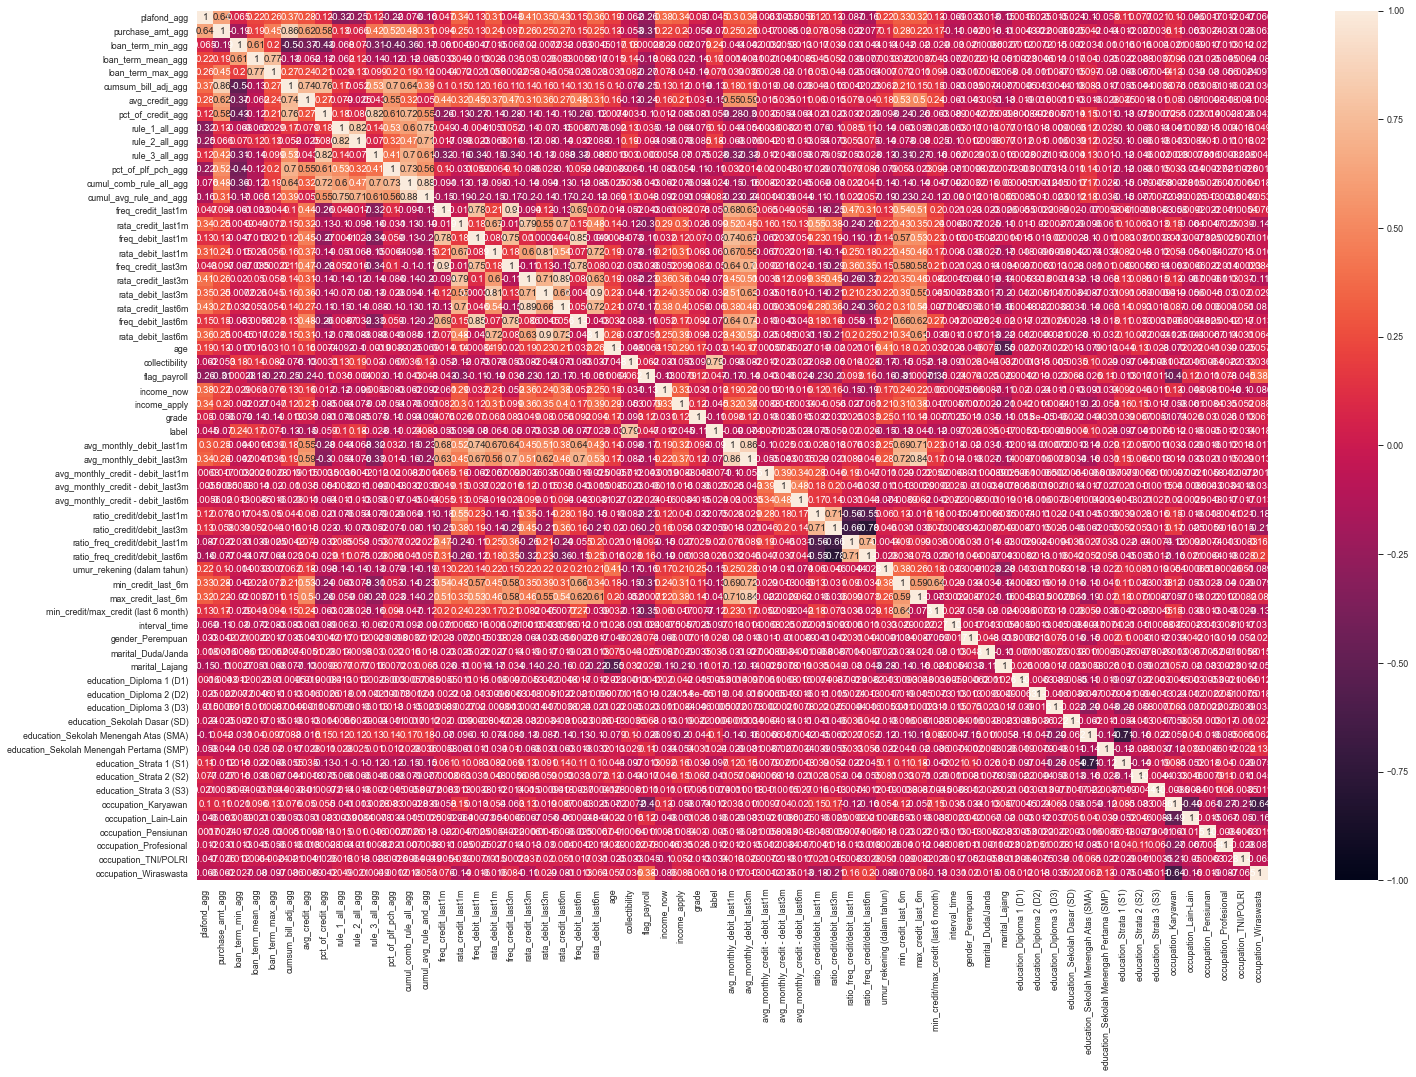

In [35]:
fig, ax = plt.subplots(figsize=(24,16))
sns.heatmap(cropped_for_corr.corr(method='spearman'), vmin=-1, vmax=1, annot=True)
plt.show()

# Korelasi tanpa IV (semua fitur)

In [61]:
df_train_drop = df_train.drop(columns=['phoneno'])
list_f = df_train_drop.columns.tolist()

In [62]:
df_corr_iv_1 = df_train[list_f]
df_corr_new1 = df_corr_iv_1.drop(columns='fraud')
df_corr_new1.head()

correlation_1 = cross_corr_mean(df_corr_new1, corr_coeff=0.9, savefile=1)

df_corr_new1['fraud'] = df_corr_iv_1['fraud']
df_selected_features1 = df_corr_new1.drop(columns=correlation_1)
selected_features = df_selected_features1.columns.to_list()[:-1]

In [65]:
selected_features

['device_used',
 'device_used_nan',
 'last_used_cnt',
 'login_attempt_l1d',
 'login_attempt_l3d',
 'last_used_cnt_l1h',
 'last_used_cnt_l6h',
 'last_used_cnt_l1d',
 'last_used_cnt_l3d',
 'most_used_cnt_l12h',
 'most_used_cnt_l1d',
 'most_used_cnt_l2d',
 'total_last_used',
 'total_last_used_cnt_l1h',
 'total_last_used_cnt_l1d',
 'total_most_used_cnt_l1h',
 'total_most_used_cnt_l1d',
 'total_init',
 'total_success',
 'otp_attempt_mean',
 'otp_attempt_median',
 'otp_attempt_min',
 'otp_attempt_max',
 'otp_interval_median',
 'otp_interval_min',
 'otp_interval_max',
 'last_used_pct_l1h',
 'last_used_pct_l3h',
 'last_used_pct_l12h',
 'last_used_pct_l1d',
 'last_used_pct_l2d',
 'last_used_pct_l1h_dev',
 'most_used_pct',
 'most_used_pct_l3d',
 'most_used_pct_dev',
 'most_used_pct_l3d_dev',
 'diff_last_pct_l1h',
 'diff_last_pct_l6h',
 'diff_last_pct_l3d',
 'diff_most_pct_l1h',
 'diff_most_pct_l1d']

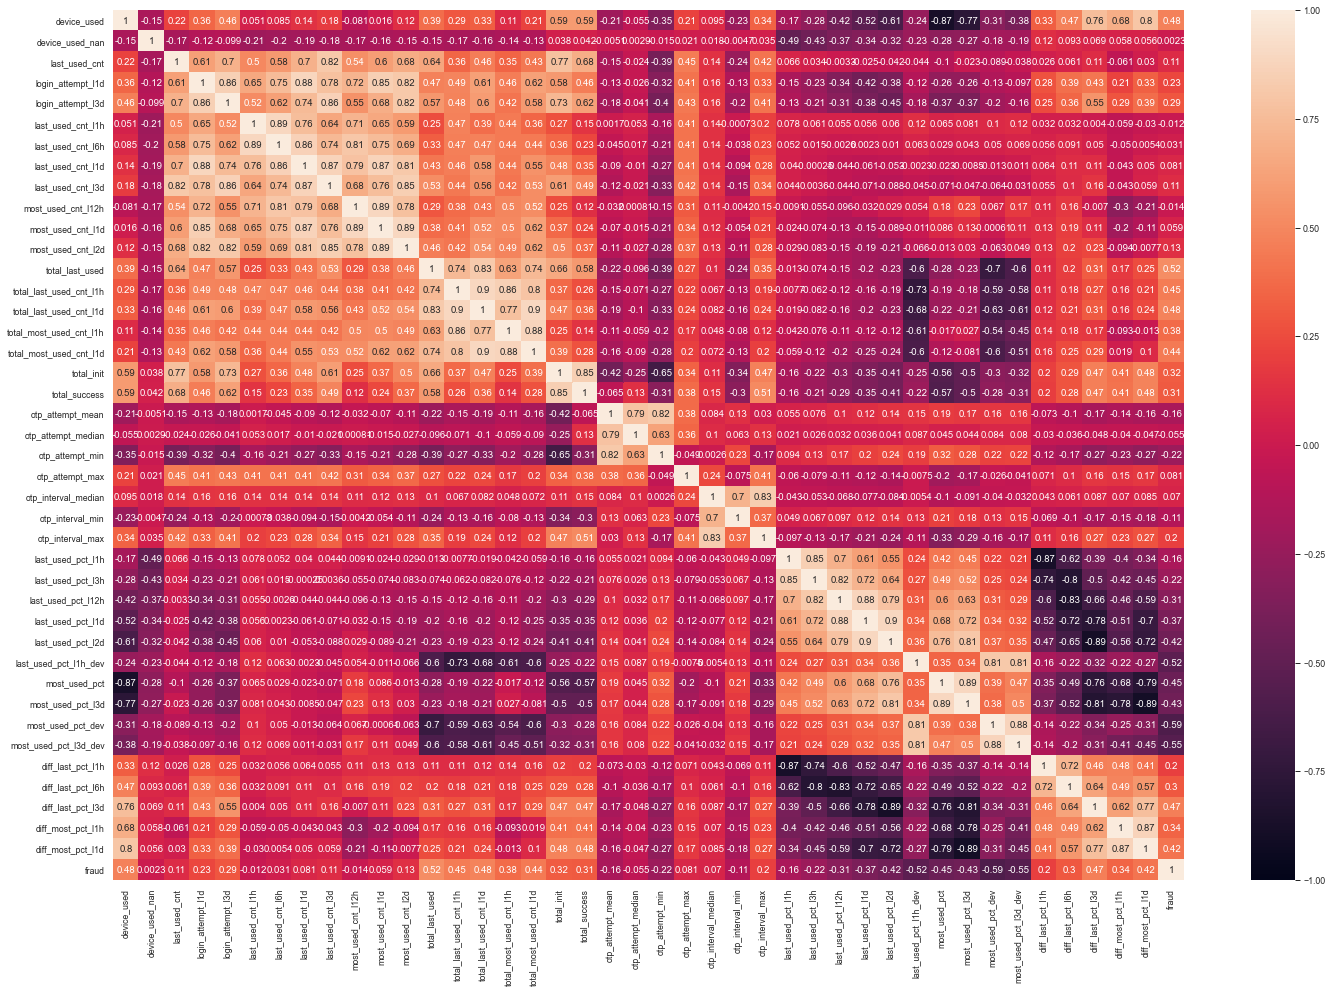

In [48]:
pearson_corr = df_selected_features1.corr(method='spearman')
#cropped_for_corr = df_selected_features_all.iloc[:,:40]
cropped_for_corr = df_selected_features1
cropped_for_corr['fraud'] = df_selected_features1['fraud']
fig, ax = plt.subplots(figsize=(24,16))
sns.heatmap(cropped_for_corr.corr(method='spearman'), vmin=-1, vmax=1, annot=True)
plt.show()

# Hasil IV dilakukan correlation antar fitur (disaring lagi)

## FITUR 1 0.02 <= IV <= 0.5

In [103]:
list_fitur_1

['most_used_pct_l12h',
 'most_used_pct_l3h',
 'most_used_pct_l6h',
 'login_attempt_l1d',
 'most_used_pct_l1d',
 'diff_most_pct_l1h',
 'most_used_pct_l2d',
 'most_used_pct_l3d',
 'diff_most_pct_l3h',
 'diff_most_pct_l6h',
 'otp_interval_max',
 'diff_most_pct_l12h',
 'most_used_pct_l1h',
 'most_used_cnt_l1h',
 'diff_most_pct_l1d',
 'diff_most_device_l12h',
 'most_used_cnt_l3h',
 'most_used_cnt_l6h',
 'diff_most_pct_l2d',
 'otp_attempt_min',
 'most_used_cnt_l12h',
 'most_used_cnt',
 'login_attempt_l12h',
 'diff_most_device_l6h',
 'most_used_cnt_l3d',
 'most_used_cnt_l2d',
 'login_attempt_l6h',
 'otp_interval_mean',
 'diff_most_device_l3h',
 'otp_attempt_mean',
 'most_used_cnt_l1d',
 'last_used_cnt_l3d',
 'diff_most_device_l1h',
 'login_attempt_l3h',
 'last_used_cnt_l2d',
 'otp_interval_min',
 'last_used_cnt',
 'last_used_cnt_l1d',
 'otp_interval_median',
 'login_attempt_l1h',
 'last_used_cnt_l12h',
 'otp_attempt_max',
 'otp_attempt_median',
 'last_used_cnt_l6h']

In [104]:
list_f_1 = list_fitur_1
list_f_1.append('fraud')
list_f_1

['most_used_pct_l12h',
 'most_used_pct_l3h',
 'most_used_pct_l6h',
 'login_attempt_l1d',
 'most_used_pct_l1d',
 'diff_most_pct_l1h',
 'most_used_pct_l2d',
 'most_used_pct_l3d',
 'diff_most_pct_l3h',
 'diff_most_pct_l6h',
 'otp_interval_max',
 'diff_most_pct_l12h',
 'most_used_pct_l1h',
 'most_used_cnt_l1h',
 'diff_most_pct_l1d',
 'diff_most_device_l12h',
 'most_used_cnt_l3h',
 'most_used_cnt_l6h',
 'diff_most_pct_l2d',
 'otp_attempt_min',
 'most_used_cnt_l12h',
 'most_used_cnt',
 'login_attempt_l12h',
 'diff_most_device_l6h',
 'most_used_cnt_l3d',
 'most_used_cnt_l2d',
 'login_attempt_l6h',
 'otp_interval_mean',
 'diff_most_device_l3h',
 'otp_attempt_mean',
 'most_used_cnt_l1d',
 'last_used_cnt_l3d',
 'diff_most_device_l1h',
 'login_attempt_l3h',
 'last_used_cnt_l2d',
 'otp_interval_min',
 'last_used_cnt',
 'last_used_cnt_l1d',
 'otp_interval_median',
 'login_attempt_l1h',
 'last_used_cnt_l12h',
 'otp_attempt_max',
 'otp_attempt_median',
 'last_used_cnt_l6h',
 'fraud']

In [105]:
df_corr_iv_1 = df_train[list_f_1]
df_corr_new1 = df_corr_iv_1.drop(columns='fraud')
df_corr_new1.head()

most_used_pct_l12h  most_used_pct_l3h  most_used_pct_l6h  \
0                 1.0                1.0                1.0   
1                 1.0                1.0                1.0   
2                 1.0                1.0                1.0   
3                 0.0                0.0                0.0   
4                 1.0                1.0                1.0   

   login_attempt_l1d  most_used_pct_l1d  diff_most_pct_l1h  most_used_pct_l2d  \
0                4.0                1.0                0.0                1.0   
1                2.0                1.0                0.0                1.0   
2                3.0                1.0                0.0                1.0   
3                2.0                0.0                1.0                0.0   
4                5.0                1.0                0.0                1.0   

   most_used_pct_l3d  diff_most_pct_l3h  diff_most_pct_l6h  otp_interval_max  \
0                1.0                0.0                0.0              59.0   
1                1.0                0.0                0.0              13.0   
2                1.0                0.0                0.0              39.0   
3                0.0                1.0                1.0              55.0   
4                1.0                0.0                0.0              22.0   

   diff_most_pct_l12h  most_used_pct_l1h  most_used_cnt_l1h  \
0                 0.0                1.0                4.0   
1                 0.0                1.0                2.0   
2                 0.0                1.0                3.0   
3                 1.0                0.0                0.0   
4                 0.0                1.0                2.0   

   diff_most_pct_l1d  diff_most_device_l12h  most_used_cnt_l3h  \
0                0.0                    0.0                4.0   
1                0.0                    0.0                2.0   
2                0.0                    0.0                3.0   
3                1.0                    2.0                0.0   
4                0.0                    0.0                5.0   

   most_used_cnt_l6h  diff_most_pct_l2d  otp_attempt_min  most_used_cnt_l12h  \
0                4.0                0.0              1.0                 4.0   
1                2.0                0.0              1.0                 2.0   
2                3.0                0.0              2.0                 3.0   
3                0.0                1.0              1.0                 0.0   
4                5.0                0.0              0.0                 5.0   

   most_used_cnt  login_attempt_l12h  diff_most_device_l6h  most_used_cnt_l3d  \
0            4.0                 4.0                   0.0                4.0   
1            2.0                 2.0                   0.0                2.0   
2            3.0                 3.0                   0.0                3.0   
3            2.0                 2.0                   2.0                0.0   
4            5.0                 5.0                   0.0                5.0   

   most_used_cnt_l2d  login_attempt_l6h  otp_interval_mean  \
0                4.0                4.0               48.0   
1                2.0                2.0               13.0   
2                3.0                3.0               25.0   
3                0.0                2.0               34.5   
4                5.0                5.0               20.0   

   diff_most_device_l3h  otp_attempt_mean  most_used_cnt_l1d  \
0                   0.0          1.000000                4.0   
1                   0.0          1.000000                2.0   
2                   0.0          2.000000                3.0   
3                   2.0          1.000000                0.0   
4                   0.0          0.666667                5.0   

   last_used_cnt_l3d  diff_most_device_l1h  login_attempt_l3h  \
0                4.0                   0.0                4.0   
1                2.0    

In [106]:
df_corr_iv_1.head()

most_used_pct_l12h  most_used_pct_l3h  most_used_pct_l6h  \
0                 1.0                1.0                1.0   
1                 1.0                1.0                1.0   
2                 1.0                1.0                1.0   
3                 0.0                0.0                0.0   
4                 1.0                1.0                1.0   

   login_attempt_l1d  most_used_pct_l1d  diff_most_pct_l1h  most_used_pct_l2d  \
0                4.0                1.0                0.0                1.0   
1                2.0                1.0                0.0                1.0   
2                3.0                1.0                0.0                1.0   
3                2.0                0.0                1.0                0.0   
4                5.0                1.0                0.0                1.0   

   most_used_pct_l3d  diff_most_pct_l3h  diff_most_pct_l6h  otp_interval_max  \
0                1.0                0.0                0.0              59.0   
1                1.0                0.0                0.0              13.0   
2                1.0                0.0                0.0              39.0   
3                0.0                1.0                1.0              55.0   
4                1.0                0.0                0.0              22.0   

   diff_most_pct_l12h  most_used_pct_l1h  most_used_cnt_l1h  \
0                 0.0                1.0                4.0   
1                 0.0                1.0                2.0   
2                 0.0                1.0                3.0   
3                 1.0                0.0                0.0   
4                 0.0                1.0                2.0   

   diff_most_pct_l1d  diff_most_device_l12h  most_used_cnt_l3h  \
0                0.0                    0.0                4.0   
1                0.0                    0.0                2.0   
2                0.0                    0.0                3.0   
3                1.0                    2.0                0.0   
4                0.0                    0.0                5.0   

   most_used_cnt_l6h  diff_most_pct_l2d  otp_attempt_min  most_used_cnt_l12h  \
0                4.0                0.0              1.0                 4.0   
1                2.0                0.0              1.0                 2.0   
2                3.0                0.0              2.0                 3.0   
3                0.0                1.0              1.0                 0.0   
4                5.0                0.0              0.0                 5.0   

   most_used_cnt  login_attempt_l12h  diff_most_device_l6h  most_used_cnt_l3d  \
0            4.0                 4.0                   0.0                4.0   
1            2.0                 2.0                   0.0                2.0   
2            3.0                 3.0                   0.0                3.0   
3            2.0                 2.0                   2.0                0.0   
4            5.0                 5.0                   0.0                5.0   

   most_used_cnt_l2d  login_attempt_l6h  otp_interval_mean  \
0                4.0                4.0               48.0   
1                2.0                2.0               13.0   
2                3.0                3.0               25.0   
3                0.0                2.0               34.5   
4                5.0                5.0               20.0   

   diff_most_device_l3h  otp_attempt_mean  most_used_cnt_l1d  \
0                   0.0          1.000000                4.0   
1                   0.0          1.000000                2.0   
2                   0.0          2.000000                3.0   
3                   2.0          1.000000                0.0   
4                   0.0          0.666667                5.0   

   last_used_cnt_l3d  diff_most_device_l1h  login_attempt_l3h  \
0                4.0                   0.0                4.0   
1                2.0    

In [109]:
correlation_1 = cross_corr_mean(df_corr_new1, corr_coeff=0.9, savefile=1)

In [110]:
df_corr_new1['fraud'] = df_corr_iv_1['fraud']
df_selected_features1 = df_corr_new1.drop(columns=correlation_1)
selected_features_1 = df_selected_features1.columns.to_list()[:-1]

In [112]:
selected_features_1

['most_used_pct_l3d',
 'diff_most_pct_l1d',
 'otp_attempt_min',
 'most_used_cnt_l12h',
 'most_used_cnt_l3d',
 'otp_attempt_mean',
 'most_used_cnt_l1d',
 'last_used_cnt_l3d',
 'diff_most_device_l1h',
 'otp_interval_min',
 'last_used_cnt',
 'otp_interval_median',
 'login_attempt_l1h',
 'otp_attempt_max',
 'otp_attempt_median',
 'last_used_cnt_l6h']

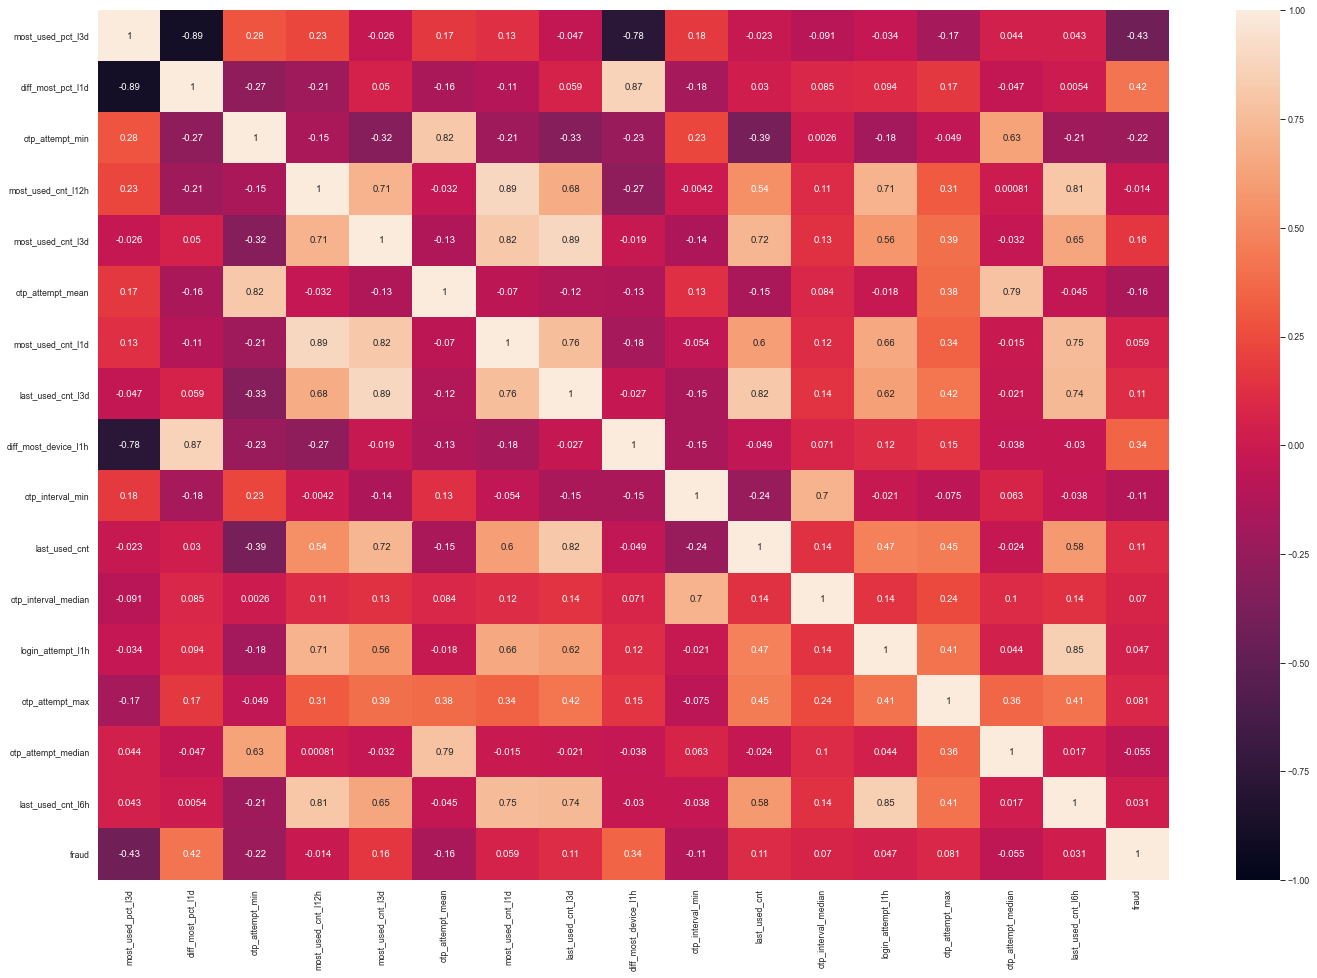

In [114]:
pearson_corr = df_selected_features1.corr(method='spearman')
#cropped_for_corr = df_selected_features_all.iloc[:,:40]
cropped_for_corr = df_selected_features1
cropped_for_corr['fraud'] = df_selected_features1['fraud']
fig, ax = plt.subplots(figsize=(24,16))
sns.heatmap(cropped_for_corr.corr(method='spearman'), vmin=-1, vmax=1, annot=True)
plt.show()

## FITUR 2 IV 0.1 < IV <= 0.5

In [62]:
list_f_2 = list_fitur_2
list_f_2.append('label')

In [63]:
df_corr_iv_2 = df_train[list_f_2]
df_corr_new2 = df_corr_iv_2.drop(columns='label')
correlation_2 = cross_corr_mean(df_corr_new2, corr_coeff=0.9, savefile=1)
df_corr_new2['label'] = df_corr_iv_2['label']
df_selected_features2 = df_corr_new2.drop(columns=correlation_2)
selected_features_2 = df_selected_features2.columns.to_list()[:-1]

In [69]:
selected_features_2

['loan_term_mean_agg',
 'rule_2_all_agg',
 'rule_1_all_agg',
 'avg_credit_agg',
 'umur_rekening (hari)',
 'avg_monthly_credit - debit_last1m',
 'avg_monthly_credit - debit_last3m',
 'cumsum_bill_adj_agg',
 'interval_time',
 'avg_monthly_credit - debit_last6m',
 'min_credit_last_6m',
 'cumul_comb_rule_all_agg',
 'grade',
 'min_credit/max_credit (last 6 month)',
 'freq_credit_last3m',
 'rata_credit_last1m',
 'purchase_amt_agg',
 'freq_credit_last1m',
 'freq_debit_last1m',
 'avg_monthly_debit_last1m',
 'education_Strata 1 (S1)',
 'education_Sekolah Menengah Atas (SMA)',
 'avg_monthly_debit_last6m']

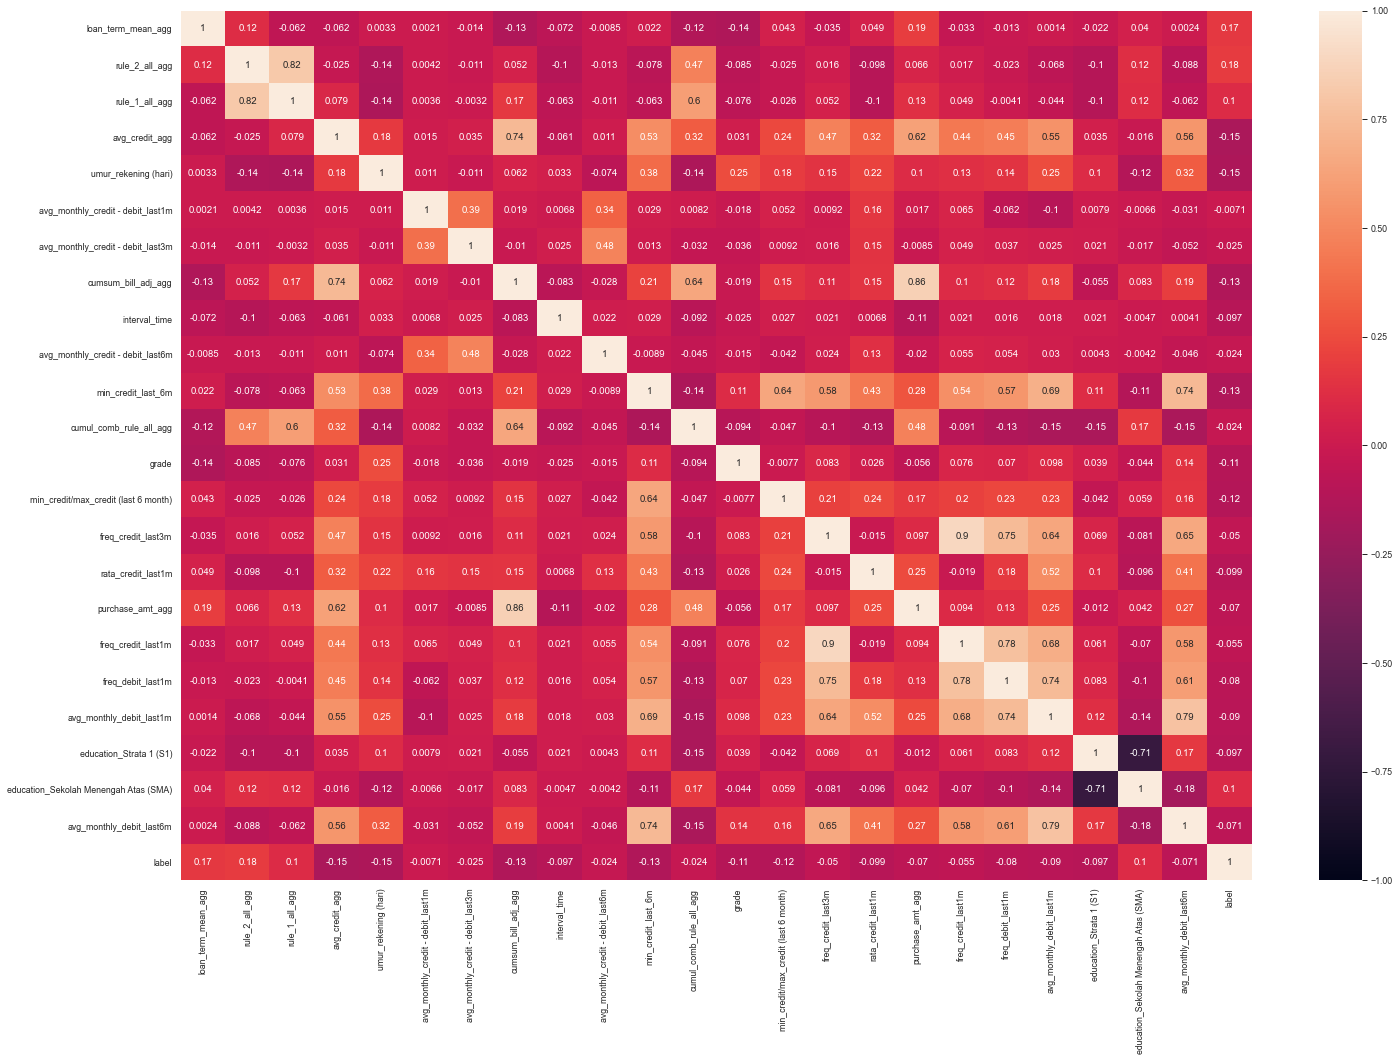

In [70]:
pearson_corr = df_selected_features2.corr(method='spearman')
#cropped_for_corr = df_selected_features_all.iloc[:,:40]
cropped_for_corr = df_selected_features2
cropped_for_corr['label'] = df_selected_features2['label']
fig, ax = plt.subplots(figsize=(24,16))
sns.heatmap(cropped_for_corr.corr(method='spearman'), vmin=-1, vmax=1, annot=True)
plt.show()

## FITUR 3 IV 0.3 < IV <= 0.5

In [71]:
list_f_3 = iv_res3.sort_values('IV', ascending=False).T.columns.to_list()
list_f_3.append('label')

In [72]:
df_corr_iv_3 = df_train[list_f_3]
df_corr_new3 = df_corr_iv_3.drop(columns='label')
correlation_3 = cross_corr_mean(df_corr_new3, corr_coeff=0.9, savefile=1)
df_corr_new3['label'] = df_corr_iv_3['label']
df_selected_features3 = df_corr_new3.drop(columns=correlation_3)
selected_features_3 = df_selected_features3.columns.to_list()[:-1]

In [76]:
selected_features_3

['loan_term_mean_agg',
 'rule_2_all_agg',
 'comb_rule_all_agg',
 'rule_1_all_agg',
 'avg_credit_agg',
 'umur_rekening (dalam tahun)',
 'avg_monthly_credit - debit_last1m']

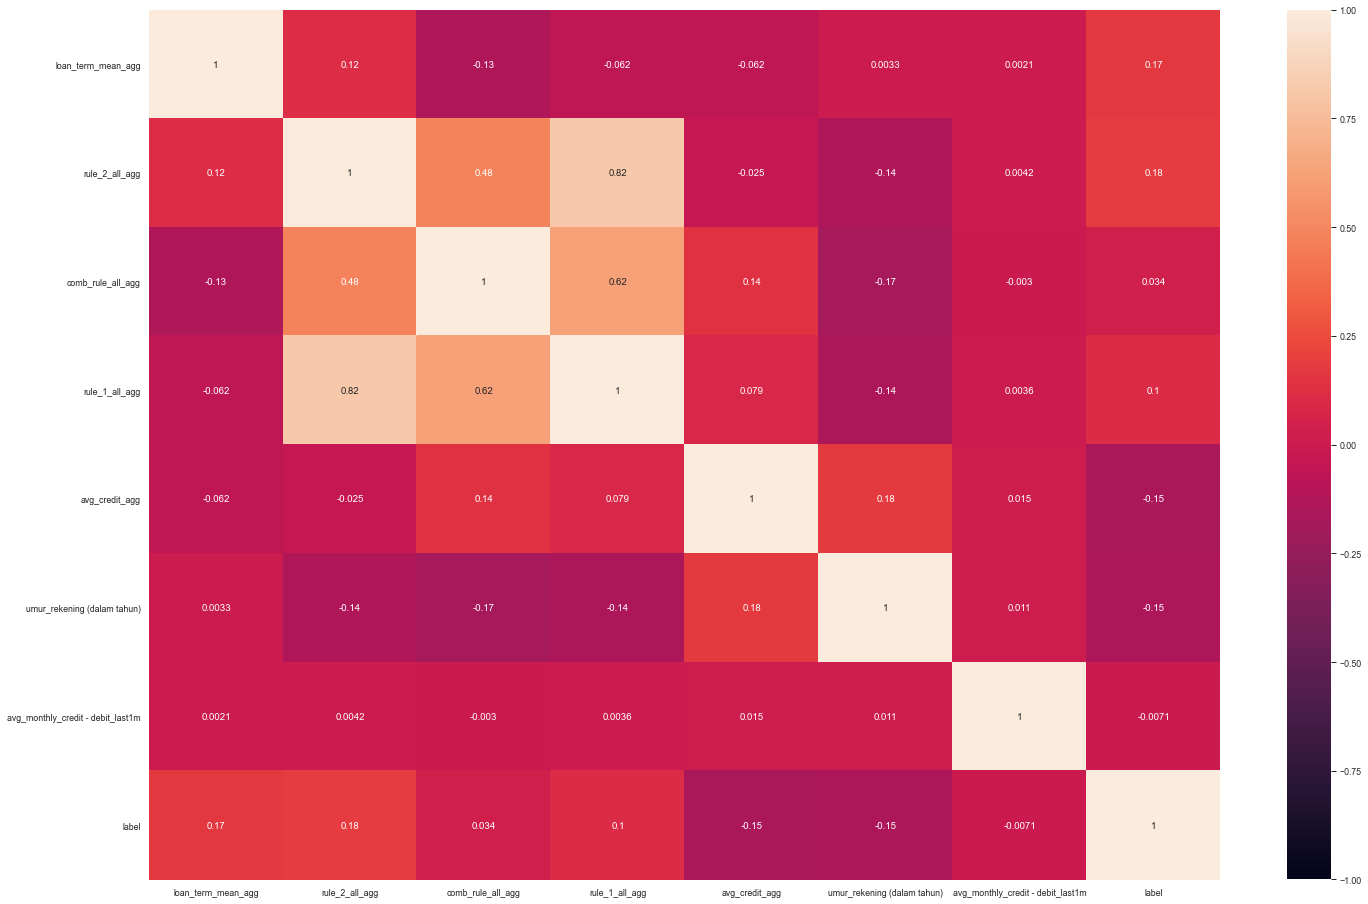

In [77]:
pearson_corr = df_selected_features3.corr(method='spearman')
#cropped_for_corr = df_selected_features_all.iloc[:,:40]
cropped_for_corr = df_selected_features3
cropped_for_corr['label'] = df_selected_features3['label']
fig, ax = plt.subplots(figsize=(24,16))
sns.heatmap(cropped_for_corr.corr(method='spearman'), vmin=-1, vmax=1, annot=True)
plt.show()

# Correlation fitur dengan target variabel

In [83]:
def get_contigency(dframe, first_feature, second_feature):
    return chi2_contingency(pd.crosstab(dframe[first_feature], dframe[second_feature]))

def chisquare_test(dframe, first_feature, second_feature):
    calculated_value, p_value, degree_freedom, expected_value = get_contigency(dframe, first_feature, second_feature)
    return [calculated_value, p_value, degree_freedom, expected_value]

def print_stats_value(first_feature, second_feature, calculated_value, degree_freedom, prob_value=0.95):
    print("\n=== Test-Statistical ===")
    print('='*25)
    print("Degree of Freedom: %d\n" % degree_freedom)
    critical_value = chi2.ppf(prob_value, degree_freedom)
    print("Probability = %.3f; Critical Value = %.3f; Statistical Value = %.3f" % (prob_value, critical_value, calculated_value))
    
    if abs(calculated_value) >= critical_value:
        print("Result => Fitur %s dan %s saling dependen (Ho dapat ditolak)\n" % (first_feature, second_feature))
    else:
        print("Result => Fitur %s dan %s saling independen (Ho tidak dapat ditolak)\n" % (first_feature, second_feature))

def print_pvalue_value(first_feature, second_feature, p_value, prob_value=0.95):
    print("\n=== P-Value ===")
    print('='*25)
    alpha = 1.0 - prob_value
    print("Significance = %.3f; p-value = %.3f" % (alpha, p_value))
    
    if p_value <= alpha:
        print("Result => Fitur %s dan %s saling dependen (Ho dapat ditolak)\n" % (first_feature, second_feature))
    else:
        print("Result => Fitur %s dan %s saling independen (Ho tidak dapat ditolak)\n" % (first_feature, second_feature))

    print('='*25)

def interpret_pvalue(p_value, prob_value=0.95):
    alpha = 1.0 - prob_value
    dep_result = 'dependen' if p_value <= alpha else 'independen'
    return [alpha, dep_result]

def pearson_correlation(dframe, first_feature, second_feature):
    first_values = np.array(dframe[first_feature], dtype='float').flatten()
    second_values = np.array(dframe[second_feature], dtype='float').flatten()

    pearson_result = pearsonr(first_values, second_values)
    return pearson_result # output -> [correlation_value, p_value]

def spearman_correlation(dframe, first_feature, second_feature):
    first_values = np.array(dframe[first_feature], dtype='float').flatten()
    second_values = np.array(dframe[second_feature], dtype='float').flatten()

    spearman_result = spearmanr(first_values, second_values)
    return spearman_result # output -> [correlation_value, p_value]

def correlation_totarget(dframe, target_feature, method='pearson'):
    rs_corr = pd.DataFrame(columns=['feature_name', 'feature_target', 'correlation_value', 'p_value', 'alpha', 'result'])
    for fitur in dframe.columns.difference(target_feature).tolist():
        if method == 'pearson':
            corr_result = pearson_correlation(dframe, fitur, target_feature)
            pvalue_interpret = interpret_pvalue(corr_result[1])
        elif method == 'spearman':
            corr_result = spearman_correlation(dframe, fitur, target_feature)
            pvalue_interpret = interpret_pvalue(corr_result[1])
        elif method == 'chisquare':
            corr_result = chisquare_test(dframe, fitur, target_feature)
            pvalue_interpret = interpret_pvalue(corr_result[1])
        else:
            raise ValueError('Method \"%s\" is not available' % str(method))

        rs_corr = rs_corr.append(pd.Series([fitur, target_feature, corr_result[0], corr_result[1], pvalue_interpret[0], pvalue_interpret[1]], index=['feature_name', 'feature_target', 'correlation_value', 'p_value', 'alpha', 'result']), ignore_index=True)

    return rs_corr

In [66]:
df_corr_vote = df_train[selected_features_vote]

In [67]:
df_corr_vote['Flag'] = df_train['Flag']

In [68]:
no_q = df_corr_vote.dropna(axis='columns')

In [69]:
## CORRELATION PARAMS WITH TARGET LABEL
params_corr_vote = correlation_totarget(no_q, ['Flag'], method='spearman')
params_corr_vote

feature_name feature_target  correlation_value       p_value  \
0    Max_amt_credit_last6Bln         [Flag]           0.148297  5.547423e-11   
1     Min_cbal_base_last6bln         [Flag]           0.324149  1.409693e-48   
2                       Usia         [Flag]          -0.096978  1.926298e-05   
3  jenis_pekerjaan_UNDEFINED         [Flag]          -0.256316  2.103331e-30   
4      total_amt_credit_3bln         [Flag]           0.287162  4.724101e-38   
5       total_amt_debit_3bln         [Flag]           0.327844  1.029563e-49   
6     total_hari_credit_6bln         [Flag]           0.279562  4.483546e-36   

   alpha    result  
0   0.05  dependen  
1   0.05  dependen  
2   0.05  dependen  
3   0.05  dependen  
4   0.05  dependen  
5   0.05  dependen  
6   0.05  dependen

In [70]:
p_value_vote = params_corr_vote[(params_corr_vote.correlation_value >= 0.03) | (params_corr_vote.correlation_value <= -0.03)]

In [71]:
p_value_vote.feature_name.to_list()

['Max_amt_credit_last6Bln',
 'Min_cbal_base_last6bln',
 'Usia',
 'jenis_pekerjaan_UNDEFINED',
 'total_amt_credit_3bln',
 'total_amt_debit_3bln',
 'total_hari_credit_6bln']

## ALL FEATURES

In [115]:
df_for_corr = df_train[list_all_features]

NameError: name 'list_all_features' is not defined

In [104]:
#df_train[list_all_features].columns

df_train = df_train.drop(['cif_id'], axis=1)

In [74]:
df_for_corr['Flag'] = df_train['Flag']

In [106]:
df_train.columns

Index(['plafond_agg', 'purchase_amt_agg', 'loan_term_min_agg',
       'loan_term_mean_agg', 'loan_term_max_agg', 'total_spent_l3d_agg',
       'cumsum_bill_adj_agg', 'avg_credit_agg', 'pct_of_credit_agg',
       'rule_1_all_agg', 'rule_2_all_agg', 'rule_3_all_agg',
       'comb_rule_all_agg', 'pct_of_plf_pch_agg', 'pct_of_plf_l3d_agg',
       'comb_rule_and_agg', 'cumul_comb_rule_all_agg',
       'cumul_comb_rule_and_agg', 'cumul_avg_rule_all_agg',
       'cumul_avg_rule_and_agg', 'freq_credit_last1m', 'rata_credit_last1m',
       'freq_debit_last1m', 'rata_debit_last1m', 'freq_credit_last3m',
       'rata_credit_last3m', 'freq_debit_last3m', 'rata_debit_last3m',
       'freq_credit_last6m', 'rata_credit_last6m', 'freq_debit_last6m',
       'rata_debit_last6m', 'age', 'collectibility', 'flag_payroll',
       'income_now', 'income_apply', 'grade', 'label',
       'avg_monthly_credit_last1m', 'avg_monthly_credit_last3m',
       'avg_monthly_credit_last6m', 'avg_monthly_debit_last1m',
   

In [75]:
#df_for_corr = df_for_corr[df_for_corr.columns[~df_for_corr.isna().any()].tolist()]

In [107]:
no_null = df_train.dropna(axis='columns')

In [111]:
## CORRELATION PARAMS WITH TARGET LABEL
params_corr = correlation_totarget(no_null, ['label'], method='spearman')
params_corr

feature_name feature_target  \
0                                        age        [label]   
1                             avg_credit_agg        [label]   
2          avg_monthly_credit - debit_last1m        [label]   
3          avg_monthly_credit - debit_last3m        [label]   
4          avg_monthly_credit - debit_last6m        [label]   
5                  avg_monthly_credit_last1m        [label]   
6                  avg_monthly_credit_last3m        [label]   
7                  avg_monthly_credit_last6m        [label]   
8                   avg_monthly_debit_last1m        [label]   
9                   avg_monthly_debit_last3m        [label]   
10                  avg_monthly_debit_last6m        [label]   
11                            collectibility        [label]   
12                         comb_rule_all_agg        [label]   
13                         comb_rule_and_agg        [label]   
14                       cumsum_bill_adj_agg        [label]   
15                    cumul_avg_rule_all_agg        [label]   
16                    cumul_avg_rule_and_agg        [label]   
17                   cumul_comb_rule_all_agg        [label]   
18                   cumul_comb_rule_and_agg        [label]   
19                  education_Diploma 1 (D1)        [label]   
20                  education_Diploma 2 (D2)        [label]   
21                  education_Diploma 3 (D3)        [label]   
22              education_Sekolah Dasar (SD)        [label]   
23     education_Sekolah Menengah Atas (SMA)        [label]   
24  education_Sekolah Menengah Pertama (SMP)        [label]   
25                   education_Strata 1 (S1)        [label]   
26                   education_Strata 2 (S2)        [label]   
27                   education_Strata 3 (S3)        [label]   
28                              flag_payroll        [label]   
29                        freq_credit_last1m        [label]   
30                        freq_credit_last3m        [label]   
31                        freq_credit_last6m        [label]   
32                         freq_debit_last1m        [label]   
33                         freq_debit_last3m        [label]   
34                         freq_debit_last6m        [label]   
35                          gender_Laki-laki        [label]   
36                          gender_Perempuan        [label]   
37                                     grade        [label]   
38                              income_apply        [label]   
39                                income_now        [label]   
40                             interval_time        [label]   
41                         loan_term_max_agg        [label]   
42                        loan_term_mean_agg        [label]   
43                         loan_term_min_agg        [label]   
44                        marital_Duda/Janda        [label]   
45                            marital_Lajang        [label]   
46                           marital_Menikah        [label]   
47                        max_credit_last_6m        [label]   
48                         max_debit_last_6m        [label]   
49      min_credit/max_credit (last 6 month)        [label]   
50                        min_credit_last_6m        [label]   
51                         min_debit_last_6m        [label]   
52                       occupation_Karyawan        [label]   
53                      occupation_Lain-Lain        [label]   
54                      occupation_Pensiunan        [label]   
55                    occupation_Profesional        [label]   
56                      occupation_TNI/POLRI        [label]   
57                     occupation_Wiraswasta        [label]   
58                         pct_of_credit_agg        [label]   
59                        pct_of_plf_l3d_agg        [label]   
60                        pct_of_plf_pch_agg        [label]   
61                               plafond_agg        [label]   
62                          purchase_amt_agg        [label]   


In [112]:
params_corr.to_csv('corr_all.csv')

Filter p value part 1

In [114]:
p_value_2 = params_corr[(params_corr.correlation_value >= 0.1) | (params_corr.correlation_value <= -0.1)]

In [115]:
p_value_2

feature_name feature_target  correlation_value  \
1                          avg_credit_agg        [label]          -0.154954   
11                         collectibility        [label]           0.790621   
14                    cumsum_bill_adj_agg        [label]          -0.127870   
23  education_Sekolah Menengah Atas (SMA)        [label]           0.102057   
37                                  grade        [label]          -0.107502   
42                     loan_term_mean_agg        [label]           0.169560   
43                      loan_term_min_agg        [label]           0.237532   
49   min_credit/max_credit (last 6 month)        [label]          -0.115266   
50                     min_credit_last_6m        [label]          -0.127051   
51                      min_debit_last_6m        [label]          -0.128440   
60                     pct_of_plf_pch_agg        [label]          -0.111065   
75                         rule_1_all_agg        [label]           0.104327   
76                         rule_2_all_agg        [label]           0.181493   
79            umur_rekening (dalam tahun)        [label]          -0.146489   
80                   umur_rekening (hari)        [label]          -0.146489   

          p_value  alpha    result  
1    1.467542e-55   0.05  dependen  
11   0.000000e+00   0.05  dependen  
14   2.963381e-38   0.05  dependen  
23   6.612365e-25   0.05  dependen  
37   1.805957e-27   0.05  dependen  
42   2.529726e-66   0.05  dependen  
43  3.836234e-130   0.05  dependen  
49   2.338033e-31   0.05  dependen  
50   8.754948e-38   0.05  dependen  
51   1.389415e-38   0.05  dependen  
60   3.210083e-29   0.05  dependen  
75   5.856861e-26   0.05  dependen  
76   7.109956e-76   0.05  dependen  
79   8.776098e-50   0.05  dependen  
80   8.776098e-50   0.05  dependen

In [117]:
list_p_2 = p_value_2.feature_name.to_list()
list_p_2.append('label')

In [118]:
list_p_2

['avg_credit_agg',
 'collectibility',
 'cumsum_bill_adj_agg',
 'education_Sekolah Menengah Atas (SMA)',
 'grade',
 'loan_term_mean_agg',
 'loan_term_min_agg',
 'min_credit/max_credit (last 6 month)',
 'min_credit_last_6m',
 'min_debit_last_6m',
 'pct_of_plf_pch_agg',
 'rule_1_all_agg',
 'rule_2_all_agg',
 'umur_rekening (dalam tahun)',
 'umur_rekening (hari)',
 'label']

In [119]:
df_p_val_2 = df_train[list_p_2]
df_p_val_2_new = df_p_val_2.drop(columns='label')
correlation_p2 = cross_corr_mean(df_p_val_2_new, corr_coeff=0.89, savefile=1)
df_p_val_2_new['label'] = df_p_val_2['label']
df_selected_features_p2 = df_p_val_2_new.drop(columns=correlation_p2)
selected_features_p2 = df_selected_features_p2.columns.to_list()[:-1]

In [120]:
selected_features_p2

['avg_credit_agg',
 'collectibility',
 'cumsum_bill_adj_agg',
 'education_Sekolah Menengah Atas (SMA)',
 'grade',
 'loan_term_mean_agg',
 'loan_term_min_agg',
 'min_credit/max_credit (last 6 month)',
 'min_debit_last_6m',
 'pct_of_plf_pch_agg',
 'rule_1_all_agg',
 'rule_2_all_agg',
 'umur_rekening (hari)']

Filter p value part 2

In [121]:
p_value_3 = params_corr[(params_corr.correlation_value >= 0.05) | (params_corr.correlation_value <= -0.05)]

In [122]:
list_p_3 = p_value_3.feature_name.to_list()
list_p_3.append('label')

In [123]:
list_p_3

['avg_credit_agg',
 'avg_monthly_credit_last1m',
 'avg_monthly_credit_last3m',
 'avg_monthly_credit_last6m',
 'avg_monthly_debit_last1m',
 'avg_monthly_debit_last3m',
 'avg_monthly_debit_last6m',
 'collectibility',
 'comb_rule_and_agg',
 'cumsum_bill_adj_agg',
 'cumul_avg_rule_and_agg',
 'education_Sekolah Menengah Atas (SMA)',
 'education_Strata 1 (S1)',
 'freq_credit_last1m',
 'freq_credit_last6m',
 'freq_debit_last1m',
 'freq_debit_last3m',
 'freq_debit_last6m',
 'grade',
 'interval_time',
 'loan_term_max_agg',
 'loan_term_mean_agg',
 'loan_term_min_agg',
 'min_credit/max_credit (last 6 month)',
 'min_credit_last_6m',
 'min_debit_last_6m',
 'pct_of_plf_l3d_agg',
 'pct_of_plf_pch_agg',
 'purchase_amt_agg',
 'rata_credit_last1m',
 'rata_credit_last3m',
 'rata_credit_last6m',
 'rata_debit_last1m',
 'ratio_credit/debit_last1m',
 'ratio_credit/debit_last3m',
 'ratio_credit/debit_last6m',
 'rule_1_all_agg',
 'rule_2_all_agg',
 'umur_rekening (dalam tahun)',
 'umur_rekening (hari)',
 'labe

In [124]:
df_p_val_3 = df_train[list_p_3]
df_p_val_3_new = df_p_val_3.drop(columns='label')
correlation_p3 = cross_corr_mean(df_p_val_3_new, corr_coeff=0.89, savefile=1)
df_p_val_3_new['label'] = df_p_val_3['label']
df_selected_features_p3 = df_p_val_3_new.drop(columns=correlation_p3)
selected_features_p3 = df_selected_features_p3.columns.to_list()[:-1]

In [125]:
selected_features_p3

['avg_credit_agg',
 'avg_monthly_debit_last1m',
 'avg_monthly_debit_last6m',
 'collectibility',
 'cumsum_bill_adj_agg',
 'cumul_avg_rule_and_agg',
 'education_Sekolah Menengah Atas (SMA)',
 'education_Strata 1 (S1)',
 'freq_credit_last1m',
 'freq_credit_last6m',
 'freq_debit_last1m',
 'freq_debit_last6m',
 'grade',
 'interval_time',
 'loan_term_max_agg',
 'loan_term_mean_agg',
 'loan_term_min_agg',
 'min_credit/max_credit (last 6 month)',
 'min_credit_last_6m',
 'pct_of_plf_pch_agg',
 'purchase_amt_agg',
 'rata_credit_last1m',
 'rata_credit_last3m',
 'rata_credit_last6m',
 'rata_debit_last1m',
 'ratio_credit/debit_last1m',
 'ratio_credit/debit_last3m',
 'ratio_credit/debit_last6m',
 'rule_1_all_agg',
 'rule_2_all_agg',
 'umur_rekening (hari)']

Filter p value part 3

In [126]:
p_value_4 = params_corr[(params_corr.correlation_value >= 0.01) | (params_corr.correlation_value <= -0.01)]

In [127]:
list_p_4 = p_value_4.feature_name.to_list()
list_p_4.append('label')

In [128]:
df_p_val_4 = df_train[list_p_4]
df_p_val_4_new = df_p_val_4.drop(columns='label')
correlation_p4 = cross_corr_mean(df_p_val_4_new, corr_coeff=0.89, savefile=1)
df_p_val_4_new['label'] = df_p_val_4['label']
df_selected_features_p4 = df_p_val_4_new.drop(columns=correlation_p4)
selected_features_p4 = df_selected_features_p4.columns.to_list()[:-1]

In [129]:
selected_features_p4

['age',
 'avg_credit_agg',
 'avg_monthly_credit - debit_last3m',
 'avg_monthly_credit - debit_last6m',
 'avg_monthly_debit_last1m',
 'avg_monthly_debit_last3m',
 'collectibility',
 'cumsum_bill_adj_agg',
 'cumul_avg_rule_and_agg',
 'cumul_comb_rule_all_agg',
 'education_Diploma 2 (D2)',
 'education_Sekolah Menengah Atas (SMA)',
 'education_Sekolah Menengah Pertama (SMP)',
 'education_Strata 1 (S1)',
 'education_Strata 2 (S2)',
 'flag_payroll',
 'freq_credit_last1m',
 'freq_credit_last6m',
 'freq_debit_last1m',
 'freq_debit_last6m',
 'gender_Perempuan',
 'grade',
 'income_apply',
 'income_now',
 'interval_time',
 'loan_term_max_agg',
 'loan_term_mean_agg',
 'loan_term_min_agg',
 'marital_Duda/Janda',
 'marital_Lajang',
 'max_credit_last_6m',
 'min_credit/max_credit (last 6 month)',
 'min_credit_last_6m',
 'occupation_Karyawan',
 'occupation_Lain-Lain',
 'occupation_Profesional',
 'occupation_TNI/POLRI',
 'occupation_Wiraswasta',
 'pct_of_credit_agg',
 'pct_of_plf_pch_agg',
 'plafond_agg

In [130]:
def bar_corr():
    fig, ax = plt.subplots(figsize=(20,10))
    sns.barplot(x='correlation_value', y='feature_name',
                data=params_corr.sort_values('correlation_value', ascending=False), orient='h',palette='RdBu_r')
    plt.xlabel('Correlation to Target Label')
    plt.ylabel('Features')
    ax.yaxis.label.set_size(10)
    ax.xaxis.label.set_size(10)

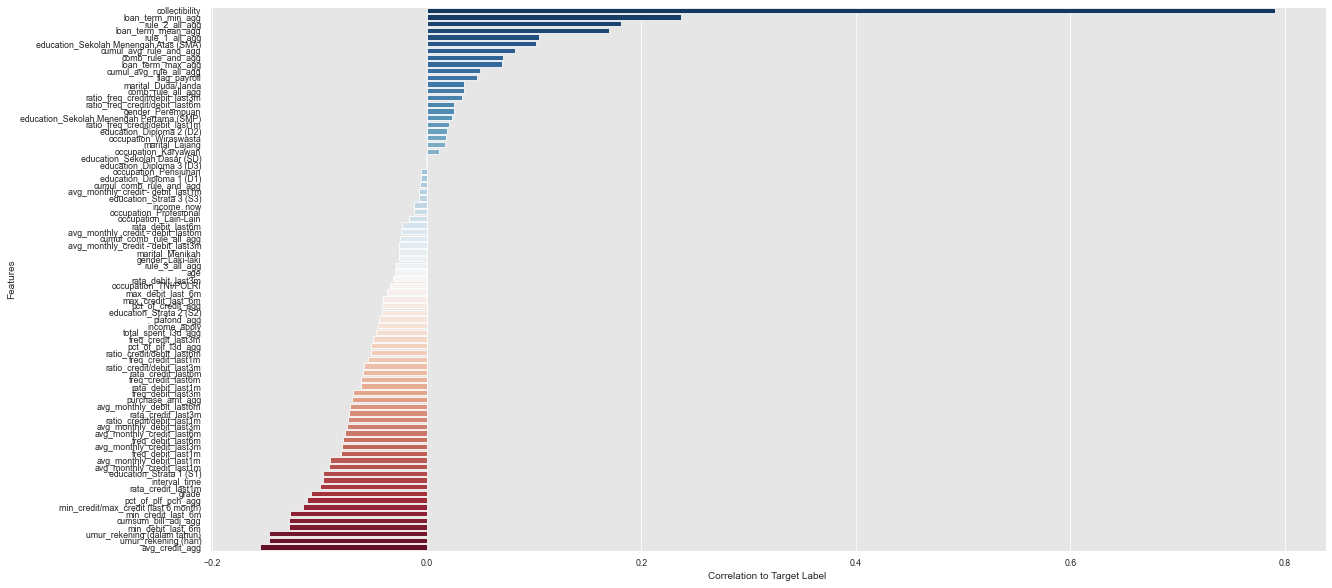

In [131]:
bar_corr()

In [95]:
iv_res2, woe_res2 = get_information_values(df_selected_features_p2, target='Flag')

Information value of Min_amt_credit_last6Bln is 0.285695
Information value of Min_cbal_base_last6bln is 0.752362
Information value of jenis_pekerjaan_UNDEFINED is 0.444967
Information value of jenis_pekerjaan_WIRASWASTA is 0.342576
Information value of pendidikan_SD/SMP is 0.067656
Information value of pendidikan_SMA is 0.08126
Information value of pendidikan_UNDEFINED is 0.183148
Information value of total_amt_credit_6bln is 1.153263
Information value of total_amt_credit_last_month1 is 0.0
Information value of total_amt_debit_last_month1 is 0.137636
Information value of total_amt_debit_last_month3 is 0.11969
Information value of total_amt_debit_last_month4 is 0.14142
Information value of total_amt_debit_last_month5 is 0.132501
Information value of total_amt_debit_last_month6 is 0.15691
Information value of total_freq_credit_3bln is 0.310698
Information value of total_freq_credit_last_month2 is 0.0


In [96]:
iv_res_p2 = iv_res2[(iv_res2.IV < 0.5) & (iv_res2.IV >= 0.1)].set_index('Variable')
iv_res_p2.sort_values('IV', ascending=False)

IV
Variable                             
jenis_pekerjaan_UNDEFINED    0.444967
jenis_pekerjaan_WIRASWASTA   0.342576
total_freq_credit_3bln       0.310698
Min_amt_credit_last6Bln      0.285695
pendidikan_UNDEFINED         0.183148
total_amt_debit_last_month6  0.156910
total_amt_debit_last_month4  0.141420
total_amt_debit_last_month1  0.137636
total_amt_debit_last_month5  0.132501
total_amt_debit_last_month3  0.119690

In [97]:
selected_features_p2_iv = iv_res_p2.index.to_list()

In [98]:
selected_features_p2_iv

['Min_amt_credit_last6Bln',
 'jenis_pekerjaan_UNDEFINED',
 'jenis_pekerjaan_WIRASWASTA',
 'pendidikan_UNDEFINED',
 'total_amt_debit_last_month1',
 'total_amt_debit_last_month3',
 'total_amt_debit_last_month4',
 'total_amt_debit_last_month5',
 'total_amt_debit_last_month6',
 'total_freq_credit_3bln']

WoE

In [99]:
woe_df = woe_res.groupby('Variable').agg(sum).reset_index()

In [100]:
woe_fitur_1 = woe_df[woe_df.Variable.isin(selected_features_1)].sort_values('IV', ascending=False)

In [101]:
woe_fitur_2 = woe_df[woe_df.Variable.isin(selected_features_2)].sort_values('IV', ascending=False)

In [102]:
woe_fitur_3 = woe_df[woe_df.Variable.isin(selected_features_3)].sort_values('IV', ascending=False)

In [103]:
woe_fitur_4 = woe_df[woe_df.Variable.isin(selected_features_p2)].sort_values('IV', ascending=False)

## Mutual Information

In [28]:
from sklearn.feature_selection import mutual_info_classif

In [29]:
df_int = df_train.select_dtypes(exclude=['object'])

In [31]:
list_column = df_int.columns.to_list()
list_inf    = []

for i in range(df_int.shape[1]):
    list_inf.append(df_int[list_column[i]].max())
    
inf_list = pd.DataFrame(
    {'Fitur': list_column,
     'Inf ?': list_inf,
    })

inf_list

Fitur         Inf ?
0                                          plafond_agg  2.000000e+07
1                                     purchase_amt_agg  1.025543e+08
2                                    loan_term_min_agg  1.200000e+01
3                                       rule_1_all_agg  4.900000e+01
4                                       rule_2_all_agg  2.300000e+01
5                                       rule_3_all_agg  1.210000e+02
6                                    comb_rule_all_agg  1.230000e+02
7                                   pct_of_plf_pch_agg  3.353883e+01
8                                   pct_of_plf_l3d_agg  4.551083e+01
9                                    comb_rule_and_agg  1.250000e+02
10                             cumul_comb_rule_all_agg  4.687000e+03
11                             cumul_comb_rule_and_agg  4.859000e+03
12                              cumul_avg_rule_all_agg  5.908065e+01
13                              cumul_avg_rule_and_agg  6.321429e+01
14                                  freq_credit_last1m  8.707000e+03
15                                  rata_credit_last1m  1.756407e+08
16                                   freq_debit_last1m  1.101500e+04
17                                   rata_debit_last1m  3.473876e+08
18                                  freq_credit_last3m  2.725900e+04
19                                  rata_credit_last3m  1.594671e+08
20                                   freq_debit_last3m  2.335000e+04
21                                   rata_debit_last3m  3.185136e+08
22                                  freq_credit_last6m  3.289000e+04
23                                  rata_credit_last6m  3.248830e+08
24                                   freq_debit_last6m  4.262700e+04
25                                   rata_debit_last6m  3.214440e+08
26                                                 age  6.600000e+01
27                                        flag_payroll  1.000000e+00
28                                          income_now  2.500000e+08
29                                        income_apply  1.000000e+09
30                                               grade  4.000000e+00
31                           avg_monthly_credit_last1m  5.073330e+09
32                           avg_monthly_credit_last3m  6.768042e+09
33                           avg_monthly_credit_last6m  7.120381e+09
34                            avg_monthly_debit_last1m  5.110565e+09
35                            avg_monthly_debit_last3m  6.901128e+09
36                            avg_monthly_debit_last6m  7.071768e+09
37                   avg_monthly_credit - debit_last1m  6.444786e+08
38                   avg_monthly_credit - debit_last3m  2.146166e+08
39                   avg_monthly_credit - debit_last6m  1.076637e+08
40                           ratio_credit/debit_last1m  2.889772e+03
41                           ratio_credit/debit_last3m  3.333227e+03
42                           ratio_credit/debit_last6m  2.628045e+02
43                      ratio_freq_credit/debit_last1m  7.803488e+01
44                      ratio_freq_credit/debit_last3m  5.063710e+01
45                      ratio_freq_credit/debit_last6m  2.043730e+01
46                                umur_rekening (hari)  1.083500e+04
47                         umur_rekening (dalam tahun)  2.968493e+01
48                                  min_credit_last_6m  5.209403e+09
49                                  max_credit_last_6m  8.445958e+09
50                                   min_debit_last_6m  5.333437e+09
51                                   max_debit_last_6m  8.767017e+09
52                min_credit/max_credit (last 6 month)  9.999833e-01
53                                       interval_time  3.625431e+02
54                                    gender_Laki-laki  1.000000e+00
55                                    gender_Perempuan  1.000000e+00
56                                  marital_Duda/Janda  1.000000e+00
57                                      marital

In [32]:
df_feature_2=df_int.replace([np.inf, -np.inf], np.nan).dropna()

In [37]:
df_feature_2.head()

plafond_agg  purchase_amt_agg  loan_term_min_agg  rule_1_all_agg  \
0    5000000.0           3698553                  3               1   
1    5000000.0           8404849                  1               0   
2    5000000.0           9441712                  3               1   
3    5000000.0           6336171                  1               1   
4    5000000.0           5950931                  3               1   

   rule_2_all_agg  rule_3_all_agg  comb_rule_all_agg  pct_of_plf_pch_agg  \
0               0               0                  1            0.739711   
1               0               0                  0            1.680970   
2               0               0                  1            1.888342   
3               1               0                  1            1.267234   
4               1               0                  1            1.190186   

   pct_of_plf_l3d_agg  comb_rule_and_agg  cumul_comb_rule_all_agg  \
0            0.739711                  1                        1   
1            1.990650                  0                        0   
2            1.888342                  1                        4   
3            1.484534                  2                        6   
4            1.404035                  2                        2   

   cumul_comb_rule_and_agg  cumul_avg_rule_all_agg  cumul_avg_rule_and_agg  \
0                        1                0.500000                0.500000   
1                        0                0.000000                0.000000   
2                        4                0.500000                0.500000   
3                       12                0.857143                1.714286   
4                        4                0.666667                1.333333   

   freq_credit_last1m  rata_credit_last1m  freq_debit_last1m  \
0                   9         6621546.993                119   
1                   6         2334304.167                 69   
2                   6         2527438.500                 39   
3                  14         1053968.000                 45   
4                  14         1251067.357                 45   

   rata_debit_last1m  freq_credit_last3m  rata_credit_last3m  \
0       1.341754e+06                  31         8658323.878   
1       8.319019e+05                  17         4663068.571   
2       1.130489e+06                  31         6516086.219   
3       2.421133e+05                  26         1371942.308   
4       4.520512e+05                  31         1139551.290   

   freq_debit_last3m  rata_debit_last3m  freq_credit_last6m  \
0                282       9.252740e+05                  73   
1                146       5.220592e+05                  33   
2                123       1.459606e+06                  59   
3                130       2.504312e+05                  50   
4                132       2.665658e+05                  58   

   rata_credit_last6m  freq_debit_last6m  rata_debit_last6m   age  \
0        7.420370e+06                564       9.581919e+05  39.0   
1        3.684057e+06                266       4.420984e+05  28.0   
2        1.226898e+07                316       2.471159e+06  29.0   
3        1.316269e+06                264       2.498908e+05  26.0   
4        9.501487e+05                250       2.284166e+05  24.0   

   flag_payroll  income_now  income_apply  grade  avg_monthly_credit_last1m  \
0             0  26821117.5    20000000.0    1.0                59593922.94   
1             0  11897296.0    10000000.0    1.0                14005825.00   
2             0  13184640.5    14000000.0    1.0                15164631.00   
3             0   8629410.0     8000000.0    1.0                14755552.00   
4             0     90000.0     3900000.0    1.0                17514943.00   

   avg_monthly_credit_last3m  avg_monthly_credit_last6m  \
0                89469346.74               9.028117e+07   
1                26424055.23               2.026232e+07   
2                67

In [33]:
inf_list.loc[inf_list['Inf ?']== np.inf]

Empty DataFrame
Columns: [Fitur, Inf ?]
Index: []

In [34]:
df_feature = df_feature_2.drop(columns='label')
df_feature.head()

plafond_agg  purchase_amt_agg  loan_term_min_agg  rule_1_all_agg  \
0    5000000.0           3698553                  3               1   
1    5000000.0           8404849                  1               0   
2    5000000.0           9441712                  3               1   
3    5000000.0           6336171                  1               1   
4    5000000.0           5950931                  3               1   

   rule_2_all_agg  rule_3_all_agg  comb_rule_all_agg  pct_of_plf_pch_agg  \
0               0               0                  1            0.739711   
1               0               0                  0            1.680970   
2               0               0                  1            1.888342   
3               1               0                  1            1.267234   
4               1               0                  1            1.190186   

   pct_of_plf_l3d_agg  comb_rule_and_agg  cumul_comb_rule_all_agg  \
0            0.739711                  1                        1   
1            1.990650                  0                        0   
2            1.888342                  1                        4   
3            1.484534                  2                        6   
4            1.404035                  2                        2   

   cumul_comb_rule_and_agg  cumul_avg_rule_all_agg  cumul_avg_rule_and_agg  \
0                        1                0.500000                0.500000   
1                        0                0.000000                0.000000   
2                        4                0.500000                0.500000   
3                       12                0.857143                1.714286   
4                        4                0.666667                1.333333   

   freq_credit_last1m  rata_credit_last1m  freq_debit_last1m  \
0                   9         6621546.993                119   
1                   6         2334304.167                 69   
2                   6         2527438.500                 39   
3                  14         1053968.000                 45   
4                  14         1251067.357                 45   

   rata_debit_last1m  freq_credit_last3m  rata_credit_last3m  \
0       1.341754e+06                  31         8658323.878   
1       8.319019e+05                  17         4663068.571   
2       1.130489e+06                  31         6516086.219   
3       2.421133e+05                  26         1371942.308   
4       4.520512e+05                  31         1139551.290   

   freq_debit_last3m  rata_debit_last3m  freq_credit_last6m  \
0                282       9.252740e+05                  73   
1                146       5.220592e+05                  33   
2                123       1.459606e+06                  59   
3                130       2.504312e+05                  50   
4                132       2.665658e+05                  58   

   rata_credit_last6m  freq_debit_last6m  rata_debit_last6m   age  \
0        7.420370e+06                564       9.581919e+05  39.0   
1        3.684057e+06                266       4.420984e+05  28.0   
2        1.226898e+07                316       2.471159e+06  29.0   
3        1.316269e+06                264       2.498908e+05  26.0   
4        9.501487e+05                250       2.284166e+05  24.0   

   flag_payroll  income_now  income_apply  grade  avg_monthly_credit_last1m  \
0             0  26821117.5    20000000.0    1.0                59593922.94   
1             0  11897296.0    10000000.0    1.0                14005825.00   
2             0  13184640.5    14000000.0    1.0                15164631.00   
3             0   8629410.0     8000000.0    1.0                14755552.00   
4             0     90000.0     3900000.0    1.0                17514943.00   

   avg_monthly_credit_last3m  avg_monthly_credit_last6m  \
0                89469346.74               9.028117e+07   
1                26424055.23               2.026232e+07   
2                67

In [35]:
df_feature.shape

(9869, 519)

In [15]:
list_column = df_feature.columns.to_list()
list_inf    = []

for i in range(df_feature.shape[1]):
    list_inf.append(df_feature[list_column[i]].max())
    
inf_list = pd.DataFrame(
    {'Fitur': list_column,
     'Inf ?': list_inf,
    })

In [38]:
#Mutual Information
#====================================
mi = mutual_info_classif(df_feature, df_feature_2['label'])

In [39]:
mi

array([0.        , 0.01697411, 0.02998582, 0.0158841 , 0.0184373 ,
       0.00328126, 0.0132726 , 0.0447333 , 0.02965036, 0.01465765,
       0.02161257, 0.01816487, 0.02142533, 0.01565749, 0.00812729,
       0.00566154, 0.00484616, 0.00391351, 0.00640328, 0.00340977,
       0.00249965, 0.        , 0.00763098, 0.        , 0.00373971,
       0.        , 0.        , 0.00070677, 0.01198605, 0.        ,
       0.00425725, 0.00696421, 0.        , 0.00179711, 0.00368517,
       0.        , 0.00338016, 0.00916953, 0.01067015, 0.00630925,
       0.0054275 , 0.0033358 , 0.00132631, 0.00838213, 0.00587266,
       0.00425313, 0.01301668, 0.01252152, 0.00708546, 0.        ,
       0.0157023 , 0.00245201, 0.00780092, 0.00963531, 0.00653543,
       0.        , 0.        , 0.        , 0.00373391, 0.        ,
       0.        , 0.00283701, 0.        , 0.0078748 , 0.00185217,
       0.00455371, 0.00026591, 0.00343908, 0.        , 0.00170138,
       0.        , 0.        , 0.00377328, 0.        , 0.02762

In [40]:
d = {'feature': df_feature.columns, 'mi': mi}
mi_df = pd.DataFrame(data=d)

In [41]:
mi_df.sort_values('mi', ascending=False)['feature'].to_list()

['pct_of_plf_pch_agg',
 'credit.STD(ceria.min_credit_last_6m)',
 'credit.SUM(ceria.freq_credit_last6m)',
 'credit.MAX(ceria.umur_rekening (dalam tahun))',
 'credit.SKEW(ceria.freq_debit_last6m)',
 'credit.SUM(ceria.avg_monthly_credit - debit_last1m)',
 'credit.SKEW(ceria.pct_of_plf_l3d_agg)',
 'credit.MEAN(ceria.min_credit_last_6m)',
 'credit.MAX(ceria.avg_monthly_credit - debit_last3m)',
 'credit.SUM(ceria.education_Diploma 2 (D2))',
 'credit.STD(ceria.rata_debit_last1m)',
 'credit.MAX(ceria.avg_monthly_debit_last1m)',
 'credit.MEAN(ceria.avg_monthly_credit_last1m)',
 'credit.STD(ceria.rata_credit_last6m)',
 'credit.MAX(ceria.rule_3_all_agg)',
 'credit.SUM(ceria.freq_debit_last3m)',
 'credit.SUM(ceria.avg_monthly_credit_last1m)',
 'credit.STD(ceria.income_apply)',
 'credit.MEAN(ceria.ratio_freq_credit/debit_last1m)',
 'credit.MAX(ceria.freq_debit_last1m)',
 'credit.MAX(ceria.age)',
 'credit.STD(ceria.pct_of_plf_pch_agg)',
 'credit.MAX(ceria.min_credit_last_6m)',
 'credit.SKEW(ceria.ra

In [42]:
fitur_mi = mi_df.sort_values('mi', ascending=False)['feature'].to_list()
fitur_mi.append('label')

In [43]:
df_corr_mi = df_train[fitur_mi]
df_corr_new_mi = df_corr_mi.drop(columns='label')
correlation_mi = cross_corr_mean(df_corr_new_mi, corr_coeff=0.9, savefile=1)
df_corr_new_mi['label'] = df_corr_mi['label']
df_selected_features_mi = df_corr_new_mi.drop(columns=correlation_mi)
selected_features_mi = df_selected_features_mi.columns.to_list()[:-1]
selected_features_mi

['pct_of_plf_pch_agg',
 'credit.SKEW(ceria.cumul_avg_rule_and_agg)',
 'credit.MEAN(ceria.umur_rekening (dalam tahun))',
 'credit.MEAN(ceria.ratio_credit/debit_last3m)',
 'credit.MIN(ceria.freq_credit_last6m)',
 'credit.SKEW(ceria.cumul_comb_rule_all_agg)',
 'credit.MEAN(ceria.freq_credit_last6m)',
 'credit.SKEW(ceria.ratio_freq_credit/debit_last6m)',
 'credit.MIN(ceria.umur_rekening (dalam tahun))',
 'credit.STD(ceria.umur_rekening (hari))',
 'rule_2_all_agg',
 'purchase_amt_agg',
 'rule_1_all_agg',
 'cumul_avg_rule_and_agg',
 'umur_rekening (dalam tahun)',
 'income_now',
 'credit.MAX(ceria.education_Strata 3 (S3))',
 'credit.MIN(ceria.rata_debit_last1m)',
 'avg_monthly_credit - debit_last3m',
 'interval_time',
 'credit.MAX(ceria.plafond_agg)',
 'avg_monthly_credit - debit_last1m',
 'ratio_freq_credit/debit_last1m',
 'freq_credit_last1m',
 'education_Sekolah Menengah Atas (SMA)',
 'min_credit/max_credit (last 6 month)',
 'min_credit_last_6m',
 'avg_monthly_credit_last1m',
 'credit.MIN(

In [44]:
mi_df[mi_df.sort_values('mi', ascending=False)['feature'].isin(selected_features_mi)].sort_values('mi', ascending=False)['feature'].to_list()

['pct_of_plf_pch_agg',
 'credit.SKEW(ceria.cumul_avg_rule_and_agg)',
 'credit.MEAN(ceria.umur_rekening (dalam tahun))',
 'credit.MEAN(ceria.ratio_credit/debit_last3m)',
 'credit.MIN(ceria.freq_credit_last6m)',
 'credit.SKEW(ceria.cumul_comb_rule_all_agg)',
 'credit.MEAN(ceria.freq_credit_last6m)',
 'credit.SKEW(ceria.ratio_freq_credit/debit_last6m)',
 'credit.MIN(ceria.umur_rekening (dalam tahun))',
 'credit.STD(ceria.umur_rekening (hari))',
 'rule_2_all_agg',
 'purchase_amt_agg',
 'rule_1_all_agg',
 'cumul_avg_rule_and_agg',
 'umur_rekening (dalam tahun)',
 'income_now',
 'credit.MAX(ceria.education_Strata 3 (S3))',
 'credit.MIN(ceria.rata_debit_last1m)',
 'avg_monthly_credit - debit_last3m',
 'interval_time',
 'credit.MAX(ceria.plafond_agg)',
 'avg_monthly_credit - debit_last1m',
 'ratio_freq_credit/debit_last1m',
 'freq_credit_last1m',
 'education_Sekolah Menengah Atas (SMA)',
 'min_credit/max_credit (last 6 month)',
 'min_credit_last_6m',
 'avg_monthly_credit_last1m',
 'credit.MIN(

In [45]:
hasil_mi = mi_df[mi_df.sort_values('mi', ascending=False)['feature'].isin(selected_features_mi)].sort_values('mi', ascending=False)

In [56]:
hasil_mi

feature        mi
7                                   pct_of_plf_pch_agg  0.044733
313          credit.SKEW(ceria.cumul_avg_rule_and_agg)  0.030321
225     credit.MEAN(ceria.umur_rekening (dalam tahun))  0.028732
217       credit.MEAN(ceria.ratio_credit/debit_last3m)  0.026736
255               credit.MIN(ceria.freq_credit_last6m)  0.025553
314         credit.SKEW(ceria.cumul_comb_rule_all_agg)  0.024998
182              credit.MEAN(ceria.freq_credit_last6m)  0.024747
367  credit.SKEW(ceria.ratio_freq_credit/debit_last6m)  0.024685
298      credit.MIN(ceria.umur_rekening (dalam tahun))  0.024003
445             credit.STD(ceria.umur_rekening (hari))  0.021668
4                                       rule_2_all_agg  0.018437
1                                     purchase_amt_agg  0.016974
3                                       rule_1_all_agg  0.015884
13                              cumul_avg_rule_and_agg  0.015657
47                         umur_rekening (dalam tahun)  0.012522
28                                          income_now  0.011986
105          credit.MAX(ceria.education_Strata 3 (S3))  0.011957
286                credit.MIN(ceria.rata_debit_last1m)  0.010761
38                   avg_monthly_credit - debit_last3m  0.010670
53                                       interval_time  0.009635
135                      credit.MAX(ceria.plafond_agg)  0.009416
37                   avg_monthly_credit - debit_last1m  0.009170
43                      ratio_freq_credit/debit_last1m  0.008382
14                                  freq_credit_last1m  0.008127
63               education_Sekolah Menengah Atas (SMA)  0.007875
52                min_credit/max_credit (last 6 month)  0.007801
48                                  min_credit_last_6m  0.007085
31                           avg_monthly_credit_last1m  0.006964
274             credit.MIN(ceria.occupation_Lain-Lain)  0.006872
106                     credit.MAX(ceria.flag_payroll)  0.006765
18                                  freq_credit_last3m  0.006403
39                   avg_monthly_credit - debit_last6m  0.006309
15                                  rata_credit_last1m  0.005662
40                           ratio_credit/debit_last1m  0.005428
131             credit.MAX(ceria.occupation_TNI/POLRI)  0.005262
16                                   freq_debit_last1m  0.004846
249          credit.MIN(ceria.education_Strata 1 (S1))  0.004672
120                   credit.MAX(ceria.marital_Lajang)  0.004653
65                             education_Strata 1 (S1)  0.004554
283               credit.MIN(ceria.rata_credit_last1m)  0.004452
30                                               grade  0.004257
45                      ratio_freq_credit/debit_last6m  0.004253
17                                   rata_debit_last1m  0.003914
289        credit.MIN(ceria.ratio_credit/debit_last1m)  0.003833
72                                occupation_TNI/POLRI  0.003773
24                                   freq_debit_last6m  0.003740
297                   credit.MIN(ceria.rule_3_all_agg)  0.003443
67                             education_Strata 3 (S3)  0.003439
19                                  rata_credit_last3m  0.003410
99          credit.MAX(ceria.education_Diploma 3 (D3))  0.003361
41                           ratio_credit/debit_last3m  0.003336
5                                       rule_3_all_agg  0.003281
238                credit.MIN(ceria.comb_rule_and_agg)  0.003212
241          credit.MIN(ceria.cumul_comb_rule_all_agg)  0.003140
281                      credit.MIN(ceria.plafond_agg)  0.003017
114                 credit.MAX(ceria.gender_Perempuan)  0.002992
130           credit.MAX(ceria.occupation_Profesional)  0.002972
61                            education_Diploma 3 (D3)  0.002837
277             credit.MIN(ceria.occupation_TNI/POLRI)  0.002801
127              credit.MAX(ceria.occupation_Karyawan)  0.002797
101  credit.MAX(ceria.education_Sekolah Menengah At...  0.002649
100     credit.MA

In [57]:
len(hasil_mi[hasil_mi.mi > 0.0]['feature'].to_list())

86

In [11]:
df_mi = pd.read_csv('mi_spark.csv')

In [54]:
def bar_mutual_info():
    fig, ax = plt.subplots(figsize=(20,10))
    sns.barplot(x='mi', y='feature',data=hasil_mi.sort_values('mi', ascending=False).head(30), orient='h',palette='Oranges_r')
    plt.xlabel('Mutual Information')
    plt.ylabel('Features')
    ax.yaxis.label.set_size(10)
    ax.xaxis.label.set_size(10)
    plt.show()

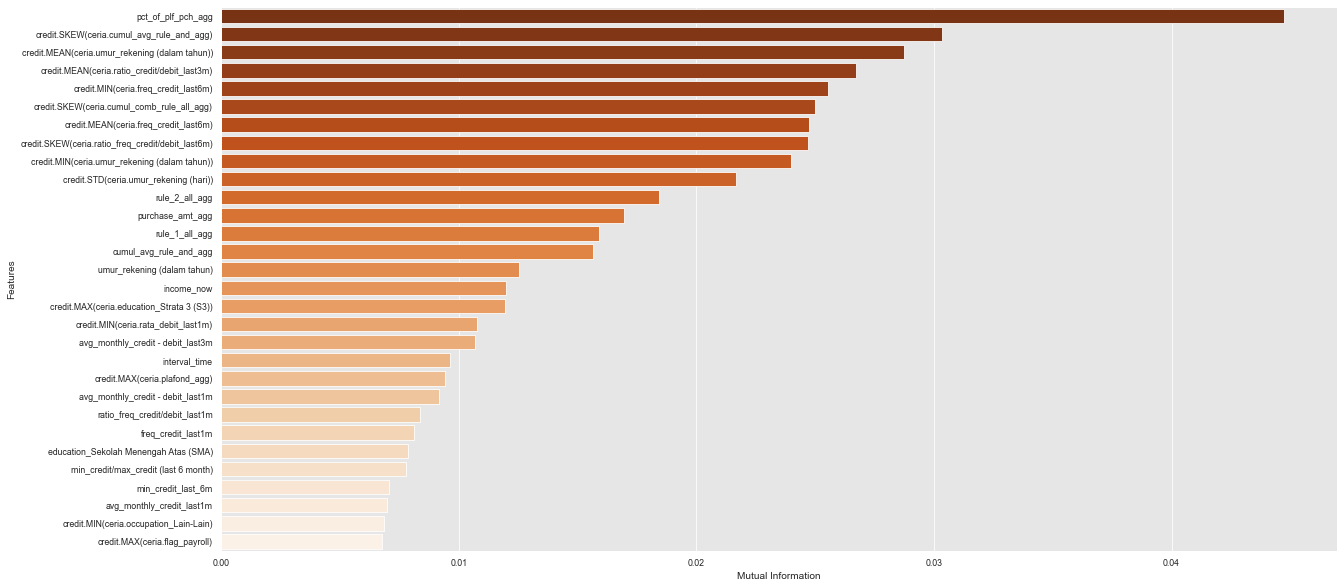

In [55]:
bar_mutual_info()

In [121]:
#SAMPAI SINI


fitur_mi = df_mi.sort_values('mi', ascending=False)['feature'].to_list()
fitur_mi.append('Flag')

NameError: name 'df_mi' is not defined

In [19]:
df_corr_mi = df_train[fitur_mi]
df_corr_new_mi = df_corr_mi.drop(columns='Flag')
correlation_mi = cross_corr_mean(df_corr_new_mi, corr_coeff=0.9, savefile=1)
df_corr_new_mi['Flag'] = df_corr_mi['Flag']
df_selected_features_mi = df_corr_new_mi.drop(columns=correlation_mi)
selected_features_mi = df_selected_features_mi.columns.to_list()[:-1]
selected_features_mi

KeyError: "['pendidikan_0', 'jenis_pekerjaan_UNDEFINED', 'jenis_pekerjaan_IBU RUMAH TANGGA', 'Jenis_Kelamin_Pria', 'jenis_pekerjaan_PEGAWAI BUMN', 'jenis_pekerjaan_PEDAGANG', 'jenis_pekerjaan_PEGAWAI NEGERI SIPIL', 'jenis_pekerjaan_PEGAWAI SWASTA', 'jenis_pekerjaan_PENGANGGUR/BELUM BEKERJA/PENCARI KERJA', 'pendidikan_SMA', 'pendidikan_MASTER', 'pendidikan_DOKTORAL', 'jenis_pekerjaan_WIRASWASTA', 'jenis_pekerjaan_PENSIUNAN', 'pendidikan_UNDEFINED', 'jenis_pekerjaan_TECHNICAL / ENGINEERING-LAINNYA', 'pendidikan_SARJANA', 'jenis_pekerjaan_Lainnya', 'Jenis_Kelamin_Wanita', 'pendidikan_SD/SMP'] not in index"

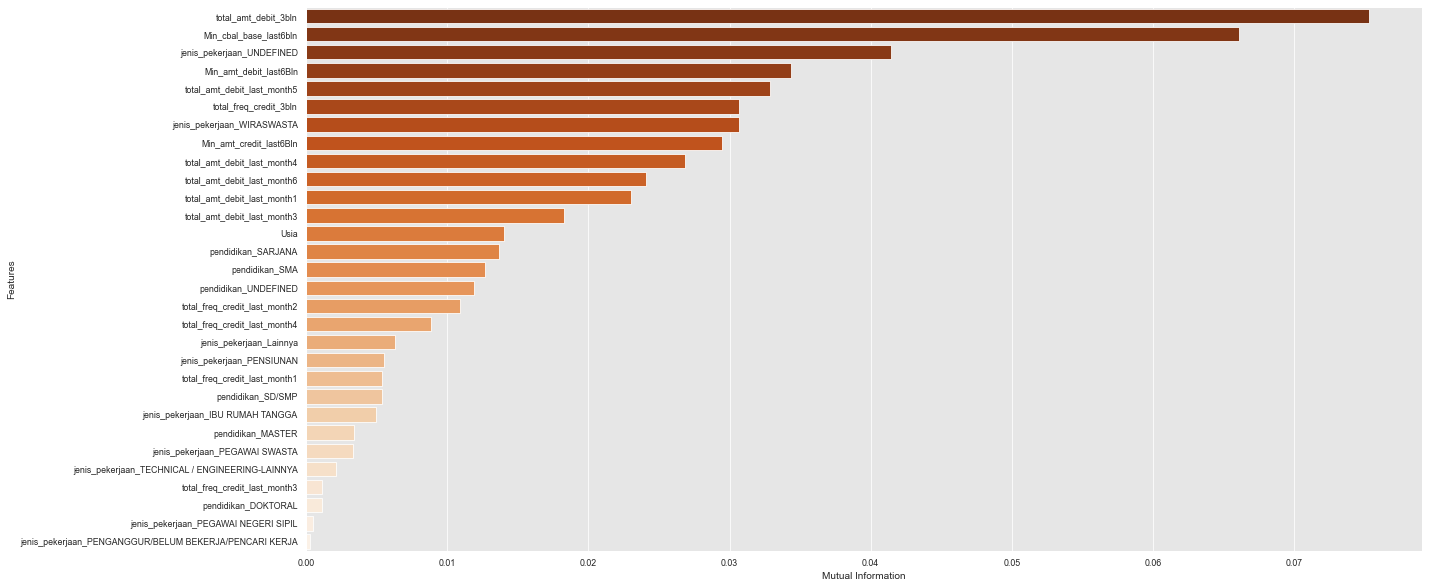

In [118]:
bar_mutual_info()